In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""
test=""
z_diff=0.1

In [2]:
shape_cat="mcal"
vol="vlim"
z_range="all_z"

In [3]:
#This header file contains all the common packages
%matplotlib inline
%run header.py $shape_cat $vol $z_range 
%run -i func.py  
%run -i corr_func.py  

In [4]:
if test=="foreground":
    members=shapes[(shapes[('All','Z')]-shapes[('All','ZRED2')])>=z_diff]
    diff=members[('All','Z')]-members[('All','ZRED2')]
    diff.hist()
    diff.describe()
    
elif test=="background":
    members=shapes[(shapes[('All','Z')]-shapes[('All','ZRED2')])<=-z_diff]
    diff=members[('All','Z')]-members[('All','ZRED2')]
    diff.hist()
    diff.describe()
elif test=="":
    members=shapes
else:
    raise TypeError

In [5]:
# if vol!="uber":
#     members=shapes

In [6]:
if quantile!="":
    i=int(quantile)

In [7]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')
elif key=="mag":
    key=('All','All','BCG_ZLUM')

In [8]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [9]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [10]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [11]:
NBINS=10

In [12]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [13]:
len(shapes)

105029

In [14]:
len(members)

105029

In [15]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [16]:
ng_abs=get_ng_list('abs', 'b')
ng_rel=get_ng_list('rel', 'b')

2it [00:00,  6.01it/s]

38036
75006
54975


8it [00:00,  9.57it/s]

951
1260
29808
757
64830
17978
18077


13it [00:00, 12.52it/s]

8190
5094
10032
1411
17169
45250
84394


20it [00:01, 13.83it/s]

51646
59379
5909


22it [00:01, 14.59it/s]

37795
65199
82895


24it [00:01, 12.66it/s]

97883
71514
76968


28it [00:01, 11.66it/s]

70968
83001
712
60132


35it [00:02, 16.53it/s]

68090
33317
27762
26519
2347


37it [00:02, 16.30it/s]

79201
27351
16768
10653
441
17511
603


51it [00:02, 23.72it/s]

75461
784
3511
418
8510
508
6489
8628
71735
101285
8975
46239
41890


55it [00:02, 20.21it/s]

8530
71660
51763


61it [00:03, 15.74it/s]

50949
103228
1295
43312


67it [00:03, 19.73it/s]

47673
42475
1319
12563
15513
4522


70it [00:03, 21.13it/s]

68676
18622
92211
31505


76it [00:03, 21.32it/s]

14508
83444
4844
731
19499
64183


82it [00:04, 20.28it/s]

82108
42314
13320
35118
15981


85it [00:04, 21.67it/s]

46259
30806
54828
2356
77980


91it [00:04, 18.73it/s]

61375
59427
13666
57085


93it [00:04, 18.56it/s]

40160
70709
74891


97it [00:05, 14.84it/s]

15519
651
25717
12745
8952


105it [00:05, 19.62it/s]

23231
1603
40023
1296
99539


108it [00:05, 17.13it/s]

55078
34437
88126


111it [00:05, 19.20it/s]

33053
1411
35617
14669
41678


117it [00:06, 18.97it/s]

79884
20258
16725
92248


120it [00:06, 17.78it/s]

71650
38424
33713
7646
46220


127it [00:06, 22.93it/s]

38963
2348
1477
7206
70867
62600


130it [00:06, 21.59it/s]

22567
27985
7154
100545


136it [00:07, 20.35it/s]

17979
1559
629
64367
94173
103113
37659


142it [00:07, 18.26it/s]

8614
9791
69210
11739
89915


148it [00:07, 18.56it/s]

8510
47618
20827
78175


151it [00:07, 18.50it/s]

56486
36205
20345
16490


155it [00:08, 16.31it/s]

69471
53559
65495
425


158it [00:08, 16.45it/s]

79488
74896
17112


160it [00:08, 16.92it/s]

36097
95854
41935


164it [00:08, 13.80it/s]

44712
82483
38993


168it [00:09, 13.76it/s]

32455
91877
30644
2866


171it [00:09, 15.73it/s]

82358
21707
975
95655


173it [00:09, 15.25it/s]

84278
13840


177it [00:09, 13.10it/s]

92576
6280
76394


181it [00:10, 12.92it/s]

77202
44910
49976
40377


184it [00:10, 14.94it/s]

668
68357
3154
61085
58812


192it [00:10, 18.87it/s]

4215
20763
1425
2016
86047
51178


195it [00:10, 18.25it/s]

69071
436
3011
33592
23920
50821


202it [00:10, 19.95it/s]

30783
89694
8012
6090
387


206it [00:11, 20.71it/s]

33948
93706
64534


212it [00:11, 20.92it/s]

34592
1434
6704
16960
67808
36272


215it [00:11, 15.09it/s]

78038
94040
7986


220it [00:11, 18.29it/s]

16168
1293
1808
31360
88944
43411


227it [00:12, 19.53it/s]

55015
5049
4640
57554
1909
31014


230it [00:12, 19.32it/s]

3963
89671
4232
356
24193


234it [00:12, 22.44it/s]

42682
95471
48321


241it [00:12, 22.51it/s]

2917
1007
1568
1809
83511
1117
18821
31787


249it [00:13, 24.34it/s]

8078
277
651
47991
93789


252it [00:13, 21.37it/s]

63975
8049
2432
29675
33494


255it [00:13, 20.54it/s]

61186
92776
47590


261it [00:13, 20.45it/s]

30393
33911
37840
4823
11445


264it [00:13, 17.60it/s]

81147
78248
93350


270it [00:14, 19.13it/s]

6532
4438
54747
364
7824
20551
773
47940


274it [00:14, 22.31it/s]

21678
12318
84400
95523


287it [00:14, 27.06it/s]

2482
862
1317
17474
20551
3198
15261
7695
731
1252


291it [00:14, 23.35it/s]

63115
35951
2070
2601


295it [00:15, 22.88it/s]

68802
42219
1495
577
23374
825


298it [00:15, 24.05it/s]

43349
37711
10402
77391


304it [00:15, 23.16it/s]

8585
1365
40366
49164
21768


307it [00:15, 23.26it/s]

430
85076
83636


310it [00:15, 17.88it/s]

48479
72896
65172


313it [00:16, 16.20it/s]

37496
1955
521
50528
83281


320it [00:16, 19.01it/s]

39696
1275
38997
76387
428


326it [00:16, 20.72it/s]

481
30429
7709
63415
421
563


332it [00:16, 22.62it/s]

48183
3890
46050
845
19135


341it [00:17, 26.10it/s]

82290
1274
21781
1443
36437
1812
1177
28643
43325
91475
102762


347it [00:17, 18.16it/s]

84247
1799
30072
9712
60437


353it [00:17, 20.11it/s]

41185
8672
77904
13478
47018


356it [00:18, 18.29it/s]

80006
45530
1281
21439
5300
48518


363it [00:18, 18.46it/s]

68137
8248
78998
27964


366it [00:18, 19.34it/s]

38974
31273
10236


371it [00:19, 15.20it/s]

97128
1835
37297
4579


375it [00:19, 16.70it/s]

551
4760
30406
93061
3719


379it [00:19, 16.98it/s]

49033
42585
26938
5235
624
3118


387it [00:19, 21.18it/s]

38634
45710
5177
73986
1025


390it [00:19, 20.74it/s]

38836
54820
1830
1340
90589


393it [00:20, 20.81it/s]

33385
29568
92883


399it [00:20, 19.24it/s]

75715
46176
1561
40439
22903
2329


405it [00:20, 20.43it/s]

11645
5078
3769
32775


408it [00:20, 20.28it/s]

87916
24476
1521
90613


411it [00:21, 17.74it/s]

19682
43132
2097
88406


418it [00:21, 17.96it/s]

1682
10063
1332
5249
17402
71622


424it [00:21, 18.97it/s]

1919
30806
22493
38260
4514


427it [00:21, 19.65it/s]

77987
1011
555
897
2744
3132
1755
6208
1098
2156


435it [00:22, 23.19it/s]

92542
57735
13540
36703


441it [00:22, 23.21it/s]

1376
43340
18317
81453


444it [00:22, 21.18it/s]

3294
23024
4743
10851


447it [00:22, 18.72it/s]

36542
82045
39066


452it [00:23, 15.42it/s]

40476
1906
78453
4013
1946


456it [00:23, 17.19it/s]

40109
91238
79351


461it [00:23, 18.77it/s]

10806
40475
483
38696
36238


468it [00:23, 20.99it/s]

58108
6674
23388
8985
1022
28943
36524


472it [00:23, 20.39it/s]

35789
733
88697
32591


475it [00:24, 18.32it/s]

49497
86401
42160
6563
2017
81427


482it [00:24, 19.05it/s]

2256
80260
17420
42606


485it [00:24, 16.25it/s]

1561
33071
247


489it [00:24, 19.33it/s]

3703
13539
42682
552
50133
11598


495it [00:25, 19.01it/s]

17312
43516
52393
42034


498it [00:25, 19.62it/s]

64710
883
54286
40646


504it [00:25, 21.07it/s]

9409
1036
17458
48337
72244


507it [00:25, 18.15it/s]

68600
45949
78052
2507


513it [00:26, 19.91it/s]

2471
47337
23813
865
83204
5371


519it [00:26, 22.00it/s]

911
5608
45237
47437
19943
7172
1899


523it [00:26, 24.71it/s]

40030
51790
2205
43775


532it [00:26, 24.61it/s]

2830
296
507
5251
5041
43151
13591
15945


540it [00:26, 27.39it/s]

61663
797
524
1938
10219
79738


544it [00:27, 23.49it/s]

103494
17921
28709
1175
6372


547it [00:27, 19.71it/s]

71846
91494
33962


550it [00:27, 19.16it/s]

40963
31788
5603
74556


556it [00:27, 18.54it/s]

88416
795
33835
26244
34875


560it [00:28, 22.05it/s]

6984
1501
1082
7458
46367
80881


563it [00:28, 20.34it/s]

27040
46130


569it [00:28, 17.11it/s]

25405
28291
8636
56063
3042


573it [00:28, 16.20it/s]

80787
8238
41176


575it [00:29, 14.81it/s]

76066
4606
1755
59991


583it [00:29, 20.18it/s]

35222
16053
3123
24618
7719
38180
1078


586it [00:29, 21.53it/s]

66615
9965
24729
83107


589it [00:29, 17.06it/s]

92448
963
8724
3982
7817
41090


598it [00:30, 22.33it/s]

34128
32551
1423
41471
73736


601it [00:30, 20.51it/s]

6773
64376
22222
1274
77446


607it [00:30, 21.20it/s]

6260
1391
6412
97682


615it [00:30, 23.05it/s]

1198
8668
2742
40258
8925
1013
67030
715


618it [00:30, 23.60it/s]

36514
53233
68727


621it [00:31, 18.58it/s]

96002
7358
40894
46240


624it [00:31, 17.89it/s]

94459
85313


628it [00:31, 13.14it/s]

96160
50277
13999


631it [00:31, 14.72it/s]

58488
2368
24748
962
2520
1369
47651


636it [00:32, 16.91it/s]

81887
94147
2175


640it [00:32, 14.16it/s]

96517
3310
3210
70117


644it [00:32, 14.73it/s]

61814
33299
3591


646it [00:32, 11.41it/s]

91498
896
995
98113


653it [00:33, 15.00it/s]

1765
2141
895
49990
41392


659it [00:33, 16.66it/s]

64171
1540
12953
12021
4600
2164
6672


666it [00:33, 21.14it/s]

2098
35474
28082
34656
1095
9277


669it [00:33, 18.68it/s]

55850
73182
573
38653


675it [00:34, 20.84it/s]

5382
7022
3093
83583
19280


678it [00:34, 16.53it/s]

98198
74723
297


681it [00:34, 16.15it/s]

74519
55343
496
709
1682


689it [00:34, 19.59it/s]

966
5667
41757
69146
12699
34889


693it [00:35, 20.95it/s]

2834
1978
58424
16660
1282
43214


701it [00:35, 24.53it/s]

896
23385
296
6313
80806
41103


704it [00:35, 24.70it/s]

1093
42867
9908
40774
51470


711it [00:35, 24.06it/s]

27658
367
27142
37856
20936
44232


714it [00:35, 23.62it/s]

6875
19496
57610
24487


723it [00:36, 26.49it/s]

1662
1757
49373
663
3665
550
40157


731it [00:36, 26.19it/s]

8421
2160
18569
38364
9873
485
27110
24282


740it [00:36, 31.20it/s]

18053
10914
34511
1835
6965
6666
1365
46157


744it [00:36, 29.07it/s]

56385
5649
2591
27682
50606
7107


751it [00:37, 26.41it/s]

57663
2138
692
633
89824
5462


756it [00:37, 30.02it/s]

7854
6155
7393
10049
47280
47703
6456


760it [00:37, 28.32it/s]

48678
53848
21997
10799


764it [00:37, 20.59it/s]

71541
74013


767it [00:38, 15.92it/s]

72473
68629


770it [00:38, 16.52it/s]

101393
43158
7945
870
549
46692


776it [00:38, 19.76it/s]

7055
12022
73905
28770
8986


779it [00:38, 21.73it/s]

18974
24857
77182
90187


785it [00:39, 17.75it/s]

70917
860
10265
6798
48197


794it [00:39, 22.83it/s]

491
1908
23516
786
28076
48808
33946


797it [00:39, 24.27it/s]

15172
19480
41966
48176
69172


800it [00:39, 19.55it/s]

65993
9014
272
86769


803it [00:39, 19.00it/s]

15843
57947


808it [00:40, 15.34it/s]

61937
504
92619
4413


813it [00:40, 18.53it/s]

25030
1783
727
43402
57868


816it [00:40, 19.61it/s]

47390
650
67327
98559


819it [00:40, 16.90it/s]

14518
95339


825it [00:41, 16.39it/s]

51501
309
43926
1097
818
44608


828it [00:41, 16.66it/s]

65792
5133
27448
77619


834it [00:41, 17.58it/s]

18045
19539
71645
776


836it [00:41, 17.32it/s]

51842
37302
74049


840it [00:41, 17.05it/s]

2545
53033
852
61948
2529


843it [00:42, 14.56it/s]

88736
70741


848it [00:42, 13.07it/s]

9176
261
17490
36777
19490


850it [00:42, 14.31it/s]

43933
19700
5163
23612
63021


857it [00:43, 16.93it/s]

502
24896
60615
26228
554
985


863it [00:43, 21.24it/s]

1407
33276
4479
55349
74182


869it [00:43, 22.04it/s]

17678
15038
3894
10906
32297


872it [00:43, 20.35it/s]

78292
48254
41776
10087


878it [00:43, 19.42it/s]

65272
76251
1404
4844


881it [00:44, 19.20it/s]

26308
68902
46389
82326
65829


887it [00:44, 15.00it/s]

73796
3978
36579
4428
5744
694
1859


891it [00:44, 17.70it/s]

90597
94507
954


897it [00:45, 17.11it/s]

14967
76126
723
9241
30334


902it [00:45, 18.49it/s]

81665
11559
5419
12370
21576


905it [00:45, 20.52it/s]

12007
40454
84254
7421


908it [00:45, 18.86it/s]

393
5390
58164
93637


913it [00:46, 17.16it/s]

41699
19327
36516
47901
879
5555


922it [00:46, 23.39it/s]

1863
311
1726
29165
50803
62369


925it [00:46, 19.75it/s]

1075
52599
69746
40511


936it [00:46, 24.49it/s]

483
6702
454
367
3764
4046
2579
1804
33640
19990
43080


940it [00:46, 24.46it/s]

42144
4165
94771
29917


947it [00:47, 23.80it/s]

811
25580
3653
9323
56338
39103


953it [00:47, 27.85it/s]

3042
1046
592
3233
44960
451
547
30892
52120


961it [00:47, 26.83it/s]

37669
40244
58057
1525


965it [00:47, 22.51it/s]

86857
41558
2177
815
47638
87589


968it [00:48, 17.08it/s]

51769
46095
629
2005
60331


975it [00:48, 18.95it/s]

80875
4359
2098
33066
102536


980it [00:48, 17.44it/s]

62730
3088
54330
13867
3251


983it [00:48, 19.09it/s]

74572
3070
83640
3475


989it [00:49, 17.66it/s]

37367
61056
20085
1259


991it [00:49, 16.00it/s]

87698
78243
3659


996it [00:49, 16.24it/s]

409
40577
45268
52128


1000it [00:50, 16.02it/s]

8155
19539
86703
72801


1002it [00:50, 15.59it/s]

39262
18389


1006it [00:50, 14.29it/s]

35252
49447
21113
9060
21806
7464
1724


1014it [00:50, 20.30it/s]

33924
41016
299
38333
33233
56777


1020it [00:50, 20.50it/s]

12995
86807
2517
11620
1118
21153
5496


1025it [00:51, 23.79it/s]

30465
40008
53537
24947


1031it [00:51, 24.21it/s]

17595
9279
62109
1299
34731
34486


1037it [00:51, 26.21it/s]

1568
37057
28567
16024
882
49098


1040it [00:51, 25.04it/s]

59956
32080
81642
27379


1048it [00:52, 21.37it/s]

21312
35551
1392
350
6557
92842


1051it [00:52, 20.62it/s]

400
17163
63004
1197
52826


1061it [00:52, 24.47it/s]

21685
874
45825
6658
1701
41429
4231


1064it [00:52, 22.90it/s]

48852
5148
52559
101131


1073it [00:53, 25.55it/s]

1275
9726
847
3361
3012
39818
6374
7933
27376


1077it [00:53, 22.58it/s]

62324
74913
5675
71656


1080it [00:53, 17.07it/s]

66920
55902
31186
633


1083it [00:53, 17.06it/s]

45871
3237
1344
72218


1089it [00:54, 18.66it/s]

468
85823
45990
25025


1096it [00:54, 23.42it/s]

38504
9693
3287
571
43624
40038


1099it [00:54, 19.26it/s]

75054
3694
78009
7861


1102it [00:54, 19.87it/s]

57724
38776
15140
44014


1107it [00:54, 18.05it/s]

89425
25631
12082
851
4276
1478


1115it [00:55, 22.66it/s]

23723
68476
7397
35620
28502


1118it [00:55, 21.83it/s]

66668
48450
452
584
1946
1484
949
81395


1127it [00:55, 24.90it/s]

49866
6050
4024
10202
53004
66418


1133it [00:56, 21.82it/s]

44747
9562
9164
63251
1150
5219
21545


1140it [00:56, 24.02it/s]

90120
2520
39123
32193
13834
14118


1145it [00:56, 26.14it/s]

551
8024
63293
73316


1148it [00:56, 22.72it/s]

6531
37347
101829
12276


1154it [00:56, 19.65it/s]

37956
35554
4410
53642
753
865


1162it [00:57, 25.38it/s]

285
2830
14510
917
577
661
478
3119


1166it [00:57, 22.45it/s]

44160
35014
28883
624
44131


1170it [00:57, 23.72it/s]

43980
1945
90790
29981


1177it [00:57, 20.04it/s]

16157
40106
56685
52967


1180it [00:58, 18.36it/s]

94867
18552
9608
74037


1183it [00:58, 17.23it/s]

55803
5397
4613
756
54780
45438


1193it [00:58, 23.86it/s]

17684
1201
1751
3142
19686
37588
61650


1196it [00:58, 19.08it/s]

99486
5219
2981
1260
2820
38912


1201it [00:58, 21.88it/s]

71628
41093
19684


1207it [00:59, 18.14it/s]

1444
45013
100846
3032


1211it [00:59, 21.34it/s]

7239
41600
765
47728
887
34904
34187
7565


1218it [00:59, 23.25it/s]

58423
10018
28176
53746
1404


1226it [00:59, 27.27it/s]

22379
7073
908
2420
30354
46113
25875
476


1230it [01:00, 26.63it/s]

75443
22010
19916
69776


1236it [01:00, 22.12it/s]

14505
79710
14459
12161
42171
23667
9439


1242it [01:00, 22.73it/s]

31040
85474
1144
41263


1245it [01:00, 15.16it/s]

56519
57502
24646


1253it [01:01, 19.37it/s]

18189
9695
15005
853
465
452
48535
661
1601
962


1258it [01:01, 21.29it/s]

37339
78210
54291


1261it [01:01, 22.26it/s]

2793
6050
589
88641
83317


1267it [01:01, 18.84it/s]

18096
82061
1580
927
35664


1272it [01:01, 22.58it/s]

9600
9058
28356
1364
28628
1697
1072
640
66799


1282it [01:02, 22.72it/s]

40514
99695
41248
4136
13071
32008
47359


1288it [01:02, 19.58it/s]

775
3736
51749
20742


1291it [01:02, 16.59it/s]

82651
76144
76684


1293it [01:03, 13.48it/s]

48798
88206


1298it [01:03, 15.79it/s]

52545
14398
430
746
777
25811


1305it [01:03, 20.46it/s]

66082
278
1978
14071
46314
468
4075


1309it [01:03, 22.40it/s]

45841
20506
1197
5557
6359
86054


1316it [01:04, 21.97it/s]

38036
57744
32373
1326
43923


1323it [01:04, 23.87it/s]

9184
24088
714
3192
33177


1326it [01:04, 25.12it/s]

37683
2884
1583
12474
845
55385


1333it [01:04, 26.52it/s]

41901
1635
33100
9498
57929
652
14715


1341it [01:04, 29.17it/s]

831
2544
21147
39961
15946
459
56849


1349it [01:05, 31.43it/s]

1158
3900
7758
8239
18220
36775
1716
41571


1353it [01:05, 29.79it/s]

36440
40261
25834
2489
35757


1361it [01:05, 29.31it/s]

83685
851
1663
5645
540
2177
39225


1365it [01:05, 24.99it/s]

4345
42012
73297


1368it [01:06, 17.64it/s]

93319
1790
553
865
13759


1375it [01:06, 18.94it/s]

99570
57680
1883
44780


1379it [01:06, 20.84it/s]

2583
18757
18637
40493
1410
13268
5778
3045


1384it [01:06, 25.15it/s]

27286
79390
47389
35428


1392it [01:07, 25.62it/s]

23735
3428
8106
50279
552
7804
2332
2435
42497


1397it [01:07, 25.70it/s]

88716
49275
53444


1403it [01:07, 22.59it/s]

17983
1334
2523
1099
102553
77197
88698


1409it [01:08, 14.90it/s]

43062
431
78677
40597
8138
598
7977


1418it [01:08, 21.45it/s]

39450
23728
2240
3434
43130
297
7623


1425it [01:08, 24.78it/s]

70511
1672
2491
48678
27658
25229


1433it [01:08, 28.67it/s]

606
1423
58813
4697
12370
17371
30737


1437it [01:09, 27.35it/s]

64006
7957
40517
1852
43261
25622


1440it [01:09, 24.46it/s]

58920
6886
45566
52275


1448it [01:09, 20.86it/s]

624
2877
7020
4087
15644
12568
8855
583
37324


1452it [01:09, 23.82it/s]

83244
1789
47248
42935


1459it [01:10, 20.15it/s]

46051
632
18627
75813


1462it [01:10, 20.00it/s]

39905
3385
70022


1465it [01:10, 16.45it/s]

87256
27413
87463


1467it [01:10, 14.08it/s]

14223
98344
88451


1473it [01:11, 14.48it/s]

40082
25063
14465
5158
85914


1477it [01:11, 15.55it/s]

28279
33141
47282
39985
50178


1482it [01:11, 16.17it/s]

15367
5676
2846
34915


1486it [01:11, 17.39it/s]

558
598
57261
40543
27457


1490it [01:12, 14.43it/s]

49537
99393
3538


1496it [01:12, 18.42it/s]

52470
16699
496
23892
36826
37681


1501it [01:12, 22.53it/s]

633
705
432
14817
421
76366


1504it [01:12, 19.96it/s]

77174
4746
103095


1507it [01:12, 18.13it/s]

25989
49272
93367


1510it [01:13, 15.56it/s]

73787
57506
79000


1516it [01:13, 15.04it/s]

33176
41356
393
87526
37631


1519it [01:13, 15.80it/s]

4711
37941
100132


1521it [01:13, 15.49it/s]

5090
10598


1526it [01:14, 14.95it/s]

1384
37473
1458
13145
62755


1528it [01:14, 14.73it/s]

26166
84353


1535it [01:14, 17.05it/s]

812
2997
499
37696
5269
877
91433


1538it [01:14, 14.17it/s]

5957
100471
12645


1545it [01:15, 19.13it/s]

7297
4413
10815
23455
18229
612
67578


1548it [01:15, 17.58it/s]

58737
3147
27909
57676


1554it [01:15, 17.04it/s]

153
39440
33072
68180


1556it [01:15, 15.66it/s]

81720
1439
1384
45710
14547


1560it [01:15, 18.64it/s]

9437
1045
1834
74905


1566it [01:16, 15.48it/s]

1172
34405
44057


1568it [01:16, 13.99it/s]

103335
687
860
1775
1659
4315


1573it [01:16, 16.90it/s]

43425
703
7704
77056


1578it [01:17, 17.50it/s]

1374
88098
22006
376
10058


1586it [01:17, 22.83it/s]

52635
3549
10541
41790
6038
37891
19936


1593it [01:17, 24.63it/s]

34510
4798
49464
6207
49412
1495


1600it [01:17, 27.72it/s]

35201
16718
2608
34614
4354
39213
74549
9496


1603it [01:18, 16.84it/s]

43423
41635
3504
82704


1609it [01:18, 16.04it/s]

16780
1000
49545
21532
1041
1936


1613it [01:18, 18.79it/s]

41966
39649
38161
13160


1619it [01:19, 17.98it/s]

61712
1402
8270
65627


1622it [01:19, 17.83it/s]

9600
513
6220
20902
7192
65305


1628it [01:19, 17.64it/s]

89600
18591
92605


1634it [01:19, 16.36it/s]

1528
4413
48071
6300
62161
1329
41986


1640it [01:20, 17.93it/s]

83501
39749
2262
45924
1701


1642it [01:20, 15.63it/s]

32019
67230


1647it [01:20, 17.92it/s]

561
906
17637
27656
39382
1196


1652it [01:20, 20.28it/s]

45374
1051
1292
24605
29749


1655it [01:21, 16.77it/s]

87106
436
33592
12317


1659it [01:21, 17.90it/s]

92649
1089
41735
71419


1670it [01:21, 24.42it/s]

5050
47833
765
17771
40686
3925
1672
976


1674it [01:21, 26.91it/s]

13011
855
31844
45540
1460
58108


1678it [01:21, 23.63it/s]

62776
49849
581
30421
45408


1681it [01:22, 23.04it/s]

38414
978
71836


1690it [01:22, 22.00it/s]

2916
756
1676
2228
4095
2728
37559
46003


1694it [01:22, 22.73it/s]

1565
1215
92839
76023


1698it [01:22, 20.50it/s]

44834
425
17784
1293
676
100540


1705it [01:23, 19.55it/s]

839
73222
46391
12267


1708it [01:23, 20.67it/s]

26252
50233
19194
65598


1714it [01:23, 19.30it/s]

46596
26823
9536
38638


1717it [01:23, 17.91it/s]

77631
3016
64695
48569


1721it [01:24, 16.79it/s]

57119
57582
1431
652


1723it [01:24, 13.33it/s]

1292
59527
54445


1730it [01:24, 14.22it/s]

449
7840
1331
31985
53877
1323


1734it [01:25, 14.75it/s]

92069
93998
11715


1738it [01:25, 16.44it/s]

3506
318
7537
72400
576


1742it [01:25, 19.36it/s]

40836
7231
27122
3120
84939
757


1748it [01:25, 18.01it/s]

57343
68360
750
1683


1756it [01:25, 24.27it/s]

36801
1553
27447
6345
28160
21718
3993
21421


1759it [01:26, 22.94it/s]

37081
61624
69434
1517
14729


1765it [01:26, 16.69it/s]

63389
48089
31522


1775it [01:26, 23.89it/s]

44187
551
18738
1514
1046
1055
1232
18589
6930
17496
59830
39859
54901


1782it [01:27, 19.25it/s]

25755
365
89807
1809


1785it [01:27, 16.19it/s]

99482
36631
45469
503


1792it [01:27, 22.30it/s]

3762
62834
26580
35913
1881
548
24419


1795it [01:27, 20.87it/s]

19403
88022
6954
3561
47246


1802it [01:28, 20.46it/s]

28267
6887
1108
5075


1806it [01:28, 21.85it/s]

1639
2351
39936
47889
2852
2681
1335


1817it [01:28, 28.07it/s]

4780
1335
581
1611
13360
20869
37906
12726
2091


1822it [01:28, 30.77it/s]

3332
34602
5100
19054
3946
4268
79780


1830it [01:28, 27.28it/s]

36052
33402
69103
1499
16484
839


1834it [01:29, 29.17it/s]

54402
23300
745
943
82679


1838it [01:29, 22.19it/s]

89969
1628
3465
3578
565
5392


1845it [01:29, 20.64it/s]

6003
61994
968
21014


1852it [01:29, 24.60it/s]

18838
10088
24386
3509
2079
8040
878


1855it [01:30, 23.45it/s]

44513
17987
1091
1835
43763


1864it [01:30, 29.12it/s]

41648
1778
1580
1616
52542
4249
14887


1868it [01:30, 26.09it/s]

67206
1701
29515
18680
2961
598
7289
49915


1877it [01:30, 29.94it/s]

1328
3876
41305
37757
102708


1881it [01:30, 23.44it/s]

49135
4166
22614
11928


1884it [01:31, 18.22it/s]

24961
24204
38370
1490


1887it [01:31, 16.28it/s]

89389
4439
627
1115
9688


1892it [01:31, 17.74it/s]

88112
36546
1281
23892
78465


1899it [01:31, 19.51it/s]

58602
732
864
45154
19104
2462


1906it [01:32, 20.74it/s]

803
5092
12744
90039


1909it [01:32, 21.52it/s]

53075
510
1452
56063
55335


1912it [01:32, 18.62it/s]

50244
48830
18965
61132


1922it [01:32, 21.80it/s]

625
4376
1443
5079
651
7902
1206
45594


1925it [01:33, 19.25it/s]

42603
24998
3685
1381
18877


1932it [01:33, 20.91it/s]

42637
43860
1534
42643
1021


1935it [01:33, 19.10it/s]

82018
7150
28640


1938it [01:33, 19.33it/s]

1142
54277
1715
5242
1260
661
3544
13712
657
28849


1950it [01:34, 26.61it/s]

28709
463
27396
29119
30390
87483


1954it [01:34, 22.79it/s]

1041
59592
13627
4028
1742
50225


1962it [01:34, 26.58it/s]

931
3345
4349
3785
91297


1966it [01:34, 21.37it/s]

1344
50190
1700
4097
2335
1818


1970it [01:34, 22.75it/s]

90378
509
48534


1976it [01:35, 19.63it/s]

90611
51661
839
7839


1979it [01:35, 20.16it/s]

3159
86565
1461
21613


1982it [01:35, 16.63it/s]

96626
80442
49292


1988it [01:35, 19.20it/s]

27886
343
5548
75483
2414


1993it [01:36, 23.00it/s]

675
8273
29449
12507
14603
73124


2000it [01:36, 23.90it/s]

38854
529
4766
16744
44417
34587
11909


2003it [01:36, 17.43it/s]

6171
56161
37176
73382


2006it [01:36, 15.23it/s]

27962
76768
30815


2010it [01:37, 12.14it/s]

39178
63976
41496


2017it [01:37, 15.32it/s]

23204
518
2295
36365
485
65299
37771


2024it [01:37, 20.19it/s]

2435
2853
29154
35426
497
44908
1340


2030it [01:38, 21.50it/s]

91050
2244
43246
19744
1886
626


2035it [01:38, 25.13it/s]

22030
4995
577
9872
34968
1321
8599
425
36852


2040it [01:38, 27.67it/s]

1126
21331
1124
31594


2047it [01:38, 19.57it/s]

42225
72263
36027
4750


2050it [01:39, 17.09it/s]

59608
39549
2843


2053it [01:39, 14.95it/s]

92537
58047
23383


2058it [01:39, 18.18it/s]

1126
1198
60262
1558
13705
494
68815


2065it [01:39, 20.07it/s]

5782
12196
20862
83321
17756


2068it [01:40, 18.44it/s]

96118
19249
563
36475
13831


2075it [01:40, 20.99it/s]

71969
43458
573
27187
1119
3530


2080it [01:40, 23.95it/s]

41628
16476
46419
31797


2083it [01:40, 17.94it/s]

16683
26472
1517
67001


2089it [01:41, 17.03it/s]

6124
62867
17169
3628


2091it [01:41, 16.21it/s]

13060
62666
7772
1292
5149
23491


2097it [01:41, 19.71it/s]

3757
44150
66521
2375
30600


2103it [01:41, 21.72it/s]

47229
855
1705
896
24773
9699
45025


2111it [01:41, 25.31it/s]

5576
9414
44839
4089
48820
696
1017


2116it [01:42, 25.32it/s]

621
80487
1036
7577
39979


2120it [01:42, 21.09it/s]

40234
662
926
3874
649


2126it [01:42, 25.39it/s]

7349
32678
11024
52698


2130it [01:42, 21.79it/s]

4102
24999
7623
58039


2138it [01:42, 25.85it/s]

4188
10577
684
2542
420
541
1502
560
84473


2145it [01:43, 25.65it/s]

729
4486
2068
19103
2099
48025


2153it [01:43, 29.32it/s]

4432
10714
4370
719
18940
26160
1140
75681


2157it [01:43, 27.96it/s]

1216
697
83678
36466
1719


2161it [01:43, 21.16it/s]

38618
12171
15618
60106


2167it [01:44, 17.23it/s]

18774
12645
73618


2172it [01:44, 20.32it/s]

10046
1356
4425
17916
59180
64057


2175it [01:44, 19.29it/s]

42146
1580
98572
8789


2183it [01:44, 21.57it/s]

8410
2619
28431
5778
19772
29032
54723


2186it [01:45, 20.37it/s]

817
65671
37433
36270
3285


2194it [01:45, 24.70it/s]

3839
13904
14656
3687
21612
16856
1091
78385


2197it [01:45, 24.13it/s]

39898
46100
26104


2203it [01:45, 16.74it/s]

100376
6094
41864
4785


2207it [01:46, 15.59it/s]

13522
4595
83376


2209it [01:46, 14.43it/s]

83435
53853
598
1663


2214it [01:46, 15.46it/s]

63151
17471
77692
30803


2223it [01:46, 21.34it/s]

27415
19916
27043
17672
637
632
966
5425


2226it [01:47, 17.36it/s]

80390
53146
82568


2229it [01:47, 17.18it/s]

37782
34995
32275
6060


2235it [01:47, 19.14it/s]

78842
41730
41809
494
11816


2238it [01:47, 19.00it/s]

92134
34548
8239
28091
15748


2241it [01:48, 16.03it/s]

44736
71261
7949


2246it [01:48, 15.67it/s]

714
3465
79558
3319
36101
973


2253it [01:48, 18.58it/s]

24998
1791
22323
102359


2256it [01:48, 18.60it/s]

33475
824
91111
47135
9376


2262it [01:49, 19.84it/s]

50472
20075
70626
4880


2269it [01:49, 24.76it/s]

48104
362
10713
632
27990
1628
51364


2272it [01:49, 22.99it/s]

46313
58144
7523
38938


2275it [01:49, 23.82it/s]

15518
8499
16319
443
899
879
4818


2280it [01:49, 23.63it/s]

81107
14298
69478


2286it [01:50, 16.06it/s]

52063
723
74518


2291it [01:50, 18.26it/s]

79547
41060
3130
2160
50136
6191


2297it [01:50, 20.66it/s]

54259
4965
19006
87426
3708


2305it [01:50, 25.19it/s]

825
481
443
26398
5123
8031
789
55372
17720
4260


2309it [01:51, 23.94it/s]

97678
1125
21821
93198


2312it [01:51, 21.92it/s]

34093
91446


2318it [01:51, 18.97it/s]

78299
695
27843
719
44184
85332


2325it [01:52, 16.46it/s]

8705
29814
33928
3942
5178
52230


2328it [01:52, 17.82it/s]

82873
1119
1894
94285


2334it [01:52, 18.77it/s]

80506
30422
6110
13510
43402
7362


2339it [01:52, 22.19it/s]

542
35198
839
20056
49868
63110


2342it [01:52, 21.30it/s]

29637
91755


2345it [01:53, 17.58it/s]

78223
676
8599
64106


2352it [01:53, 20.09it/s]

7757
11385
8774
26147
46025
889
13588


2358it [01:53, 25.08it/s]

2809
742
7819
2549
1072
2160


2362it [01:53, 20.61it/s]

89007
20469
481
609
28889


2368it [01:54, 18.79it/s]

40667
68100
46769


2371it [01:54, 20.00it/s]

19490
14541
18304
40388
1238
18896


2375it [01:54, 22.10it/s]

40137
4886
64777
78656


2382it [01:54, 20.76it/s]

1199
16832
8195
57128


2385it [01:54, 19.24it/s]

71421
53769
3573
736
6093


2388it [01:55, 21.52it/s]

29761
71453
392
74125


2394it [01:55, 20.32it/s]

52081
2829
10276
28229
35519
1257
10048


2401it [01:55, 21.40it/s]

2656
27286
27379
32373


2404it [01:55, 21.74it/s]

32718
2201
614
96393


2410it [01:56, 21.06it/s]

421
43261
44654
40677
55724


2413it [01:56, 18.09it/s]

48335
55162
621
79574


2416it [01:56, 18.71it/s]

2687
17857
4329
9082
1107
89683


2425it [01:56, 23.70it/s]

25776
481
8981
39060
336
3266
75874


2428it [01:56, 24.60it/s]

71549
96707


2434it [01:57, 19.50it/s]

75568
715
10202
23815
731
2320


2438it [01:57, 22.09it/s]

53649
36748
17487


2441it [01:57, 18.99it/s]

13475
18675
14058
543
4426
686
69808


2450it [01:57, 23.57it/s]

374
1392
22008
77076
719
6846
44796


2454it [01:58, 26.63it/s]

5294
70838
16782
65464


2464it [01:58, 27.70it/s]

1808
819
10911
481
1458
6597
35278
84845


2468it [01:58, 24.44it/s]

19924
46321
566
85391


2474it [01:58, 21.91it/s]

22607
48747
694
76177
1070
918


2477it [01:59, 20.15it/s]

94486
6840
20559
23796


2480it [01:59, 16.60it/s]

38732
38643
91622


2484it [01:59, 13.44it/s]

80361
68899
634
13058


2487it [01:59, 14.22it/s]

91827
717
4542
11270
78290


2497it [02:00, 19.35it/s]

534
2156
662
719
880
86132
35596


2504it [02:00, 24.66it/s]

1281
12519
2051
42984
1370
25871
19877


2508it [02:00, 24.88it/s]

33706
1188
63672
72775


2515it [02:00, 23.31it/s]

2271
948
4705
16067
40038
52912


2519it [02:01, 24.25it/s]

1418
23563
2833
1329
2435
66850


2522it [02:01, 20.51it/s]

40126
91274
624
4742


2528it [02:01, 18.56it/s]

59484
72432
23329
26099


2534it [02:01, 22.41it/s]

431
5609
52034
1075
4356
23096
16640
30441


2541it [02:02, 21.48it/s]

83914
15311
35877
46091
648


2549it [02:02, 24.24it/s]

573
1482
37856
12280
1174
67249
10917


2554it [02:02, 27.18it/s]

1672
41484
5650
1519
36571
35016
42090


2557it [02:02, 27.64it/s]

465
802
31208
39098


2563it [02:03, 18.59it/s]

26202
19448
51789


2566it [02:03, 17.09it/s]

32745
51545
38314


2572it [02:03, 21.61it/s]

16662
296
1601
3749
2312
644
74646


2576it [02:03, 18.84it/s]

4956
73134
5037
29071
431
8504


2583it [02:03, 20.85it/s]

58222
3185
6330
55614
296


2586it [02:04, 19.61it/s]

85846
38732
1159
364
75128


2594it [02:04, 23.82it/s]

6359
341
24678
1694
57665
25717


2597it [02:04, 23.62it/s]

33307
42211
13099


2604it [02:04, 21.27it/s]

6352
6083
855
2024
742
90274
373


2614it [02:05, 27.71it/s]

29173
855
15194
423
1154
21338
524
4278
3201
920


2618it [02:05, 26.15it/s]

18589
41559
33757
1718
399
6001


2627it [02:05, 29.77it/s]

64824
31394
2359
1494
10188
49386


2631it [02:05, 23.89it/s]

90508
73896
7594
701


2634it [02:05, 25.13it/s]

36737
9496
1561
855
70654


2637it [02:06, 23.29it/s]

20488
481
15920


2643it [02:06, 17.35it/s]

49569
10219
64752
40347
329


2646it [02:06, 16.69it/s]

18250
68287
43209


2652it [02:06, 20.38it/s]

10502
21251
21282
3041
842
905
12868


2658it [02:07, 22.08it/s]

54367
28260
3272
54703
36077


2662it [02:07, 22.13it/s]

37288
606
63918
41365
49176


2669it [02:07, 24.56it/s]

10681
1672
561
58921
7038
738
42624


2676it [02:07, 26.32it/s]

84064
2359
3093
4809
49243
16854
81475


2682it [02:08, 19.51it/s]

7587
851
10208
86431
33583
488


2685it [02:08, 17.13it/s]

90770
82417


2688it [02:08, 14.57it/s]

64256
26230
11193
1290
39579


2698it [02:08, 21.81it/s]

5016
26987
1114
576
55105
703
2616
1158
54021


2705it [02:09, 22.23it/s]

59963
952
2756
14493
85067


2708it [02:09, 18.82it/s]

11483
35638
82931


2711it [02:09, 20.90it/s]

1165
32186
8266
44494
36347


2717it [02:09, 21.45it/s]

12016
694
27424
39430
12446


2720it [02:10, 16.33it/s]

14701
65002
35574
39540


2728it [02:10, 21.83it/s]

20743
274
882
4066
46829
24041
43955
10971


2735it [02:10, 24.42it/s]

56684
6920
57368
1108
3815


2745it [02:10, 28.41it/s]

90066
1209
1429
2708
387
20743
541
35374
526
15769
704
542
21900


2751it [02:11, 30.27it/s]

13965
4941
72750
36183
74865


2755it [02:11, 26.66it/s]

11840
1601
45069
434
11817


2763it [02:11, 26.01it/s]

42199
19877
5909
5021
845
37081
419


2771it [02:11, 29.44it/s]

17456
1107
32412
6476
14191
23443
34627


2775it [02:11, 29.38it/s]

41137
560
6781
246
39698
55006


2783it [02:12, 28.44it/s]

19560
23104
4858
891
41241
29772
42283


2787it [02:12, 27.42it/s]

3695
33232
77701
4964
18378


2794it [02:12, 22.89it/s]

765
26231
20212
78223
420


2798it [02:12, 22.57it/s]

29179
12995
1443
987
985
41178


2808it [02:13, 29.78it/s]

3703
4442
43229
773
25918
549
5196
52571


2812it [02:13, 25.69it/s]

827
37849
73008
55417


2820it [02:13, 28.16it/s]

811
27609
40082
1098
5034
971
5023
47117


2824it [02:13, 26.34it/s]

39481
1540
73013
2484
46567


2828it [02:14, 25.11it/s]

15368
46707
1098
426
3595
49278
1833
56441


2838it [02:14, 24.98it/s]

7100
9140
25021
33882


2841it [02:14, 23.38it/s]

61600
660
38593
34005
360
1960


2848it [02:14, 24.38it/s]

87311
14855
12623
38950
1327
324


2855it [02:14, 29.93it/s]

21280
1448
29129
1448
1552
10491
13885
76122


2863it [02:15, 28.60it/s]

7389
994
14453
83261
1364
25787
22345


2871it [02:15, 30.72it/s]

25862
19332
33966
3532
11077
7549
17567
1661
50301


2875it [02:15, 32.65it/s]

1039
29754
849
26374


2883it [02:15, 26.20it/s]

59141
35749
6521
1507
49938
321
31380


2889it [02:16, 31.06it/s]

4165
4003
546
1933
90012
2864
12980


2897it [02:16, 29.07it/s]

41682
1736
728
46484
31143
48371


2901it [02:16, 27.80it/s]

37956
775
23269
48486
87954


2905it [02:16, 23.57it/s]

21610
9023
905
32550
73072


2911it [02:17, 21.37it/s]

25400
75250
8322
25689


2915it [02:17, 21.50it/s]

48529
2574
56717
10076
4909
52117


2925it [02:17, 24.00it/s]

1682
1306
794
39315
2152
471
38879
17858
16797
3722


2933it [02:17, 25.01it/s]

18648
56054
1263
45466
23797


2936it [02:18, 22.08it/s]

53589
32444
6522
4491
1392
2444
6117
592


2945it [02:18, 26.56it/s]

62117
26160
8614
10806
1326
469
36689


2950it [02:18, 27.30it/s]

4635
88208
589
798
84155


2957it [02:18, 27.15it/s]

8862
8130
7872
44267
3287


2965it [02:18, 30.69it/s]

27478
891
1645
12667
508
609
39466
1042
2833
6841
48154


2969it [02:19, 32.96it/s]

76331
83120


2973it [02:19, 23.08it/s]

4641
14486
35166
42326
67277


2979it [02:19, 21.42it/s]

27929
474
19298
2843
69166


2989it [02:19, 26.87it/s]

5858
2579
3857
39296
1035
2321
1747
18625
725
27483
6051


2994it [02:20, 29.38it/s]

24557
36971
11981
43855
709
10037


3004it [02:20, 30.57it/s]

494
25949
776
644
10768
22520
63801


3008it [02:20, 24.60it/s]

3504
71933
1370
714
16727
2927


3013it [02:20, 27.97it/s]

13829
38654
63937
32729


3021it [02:20, 28.66it/s]

6754
3344
44649
10624
19436
1423
32622
4757
19774


3025it [02:21, 25.91it/s]

91234
42073
899
51784


3033it [02:21, 27.67it/s]

7539
1041
45190
8298
16644
25540
1971
364
48835


3041it [02:21, 25.75it/s]

20740
42668
18877
1621


3045it [02:21, 25.69it/s]

18677
1423
1269
91387
4305
32653


3053it [02:22, 25.65it/s]

42051
948
596
541
4166
55942


3056it [02:22, 26.07it/s]

1323
29001
38122
1642
484
2782
4305
1084
1103


3068it [02:22, 33.46it/s]

17827
1091
485
36101
17583
6466
67714


3072it [02:22, 23.60it/s]

80908
1037
13332
1519
49528


3076it [02:23, 21.92it/s]

33008
81489
3605
22616


3082it [02:23, 19.80it/s]

19688
15347
77856
1055


3089it [02:23, 24.76it/s]

28065
39282
1330
948
40904
1019
23009
13568


3093it [02:23, 26.36it/s]

44279
6912
23383
81060
312
85927


3101it [02:24, 23.06it/s]

1809
9527
1197
15082
70953
423


3104it [02:24, 20.01it/s]

70486
50813
420


3107it [02:24, 18.70it/s]

90425
6860
80511
54883


3110it [02:24, 17.26it/s]

1717
82677
78605


3116it [02:25, 16.87it/s]

3161
359
3012
64763
10301
18250


3124it [02:25, 17.80it/s]

59590
2348
1484
1787
28687
23241
48447


3131it [02:25, 20.97it/s]

103596
1668
534
546
985
23847
1821
307
1423


3136it [02:25, 24.25it/s]

45505
41923
2489
41355


3142it [02:26, 21.28it/s]

82864
13124
27900
28683


3145it [02:26, 19.90it/s]

11126
59235
50845
42127


3148it [02:26, 20.31it/s]

4943
51249
1366
343
41367


3156it [02:26, 25.14it/s]

61950
37104
10968
3703
8801
23948
6373


3163it [02:27, 25.96it/s]

818
20511
1099
1304
58901
16151


3166it [02:27, 25.07it/s]

4730
49721
12214
85619


3169it [02:27, 22.02it/s]

652
39496
1262
55590


3175it [02:27, 19.38it/s]

33696
31899
19690
499
18220
20898


3182it [02:27, 20.80it/s]

45469
1945
103350
20080
405


3186it [02:28, 23.68it/s]

32354
3685
37375
70675
16203


3192it [02:28, 21.44it/s]

4203
43945
40033
35559
56952


3195it [02:28, 18.46it/s]

56078
49209
4380
72486


3198it [02:28, 15.07it/s]

41043
11078


3202it [02:29, 17.34it/s]

9175
3507
48168
662
60246


3209it [02:29, 21.18it/s]

1638
6241
5698
32831
54813
871
9749


3217it [02:29, 25.51it/s]

24421
8495
5669
2261
34689
59504
4171


3221it [02:29, 25.29it/s]

1900
9571
58478
8232
95814


3229it [02:29, 24.82it/s]

27046
1619
42347
968
1663
1484


3233it [02:30, 23.14it/s]

89733
481
19236
14334
32504


3236it [02:30, 23.69it/s]

39404
11445
47995
41215


3242it [02:30, 18.79it/s]

2707
12591
44987
17013
77729
27542
60840


3248it [02:31, 17.94it/s]

743
173
51326
393
3693
14060
7393
912


3258it [02:31, 24.64it/s]

31695
41400
1627
3731
43629
51978


3269it [02:31, 31.07it/s]

7452
565
689
4995
4595
1946
452
17545
5235
25983
1073


3273it [02:31, 27.93it/s]

76580
25974
42291
1584
1927
462
6019


3281it [02:32, 24.44it/s]

30563
36501
40653
4210
1731


3284it [02:32, 18.52it/s]

65926
73160


3288it [02:32, 21.14it/s]

6396
409
758
38156
4057
1926
21064
845


3297it [02:32, 26.40it/s]

8716
56022
689
6776
2524
39315
4134


3302it [02:32, 30.55it/s]

2658
420
3875
25923
26583
68161


3310it [02:33, 28.08it/s]

491
18559
14696
46338
7076
41682


3314it [02:33, 28.35it/s]

973
521
19170
11637
30539
1654


3322it [02:33, 27.26it/s]

14230
1321
3012
16345
21198
489
41779


3326it [02:33, 26.30it/s]

44016
2496
12350
59387


3335it [02:34, 28.27it/s]

717
2223
485
1532
489
1084
12164
37797
2000
28941


3339it [02:34, 29.01it/s]

1866
55998
40708
3965


3347it [02:34, 23.87it/s]

60382
8497
7402
1837
51315


3350it [02:34, 24.81it/s]

20409
566
51708
1070
77616


3357it [02:35, 23.37it/s]

1633
20694
6141
2863
2156
5583


3369it [02:35, 32.88it/s]

1080
1425
26046
6041
783
4820
1726
5248
719
448
6185


3374it [02:35, 30.90it/s]

1331
33304
5669
11389
43603
2688
895


3382it [02:35, 35.89it/s]

1401
1206
773
4761
511
62014
27023
56099


3391it [02:35, 33.57it/s]

606
764
15049
2008
32040
7662
37966
20744


3395it [02:36, 31.59it/s]

42877
8463
38205
1425
5766
23922


3403it [02:36, 31.00it/s]

4292
1360
78
313
49249
47441


3407it [02:36, 24.06it/s]

63223
23538
1028
31545
50307


3413it [02:36, 24.49it/s]

10625
854
1007
46176
640
1530
1098
34518


3422it [02:37, 28.70it/s]

7615
4654
54433
20806
2916
40082
16742


3431it [02:37, 32.04it/s]

965
37481
22787
5850
9442
13640
16819
38065


3439it [02:37, 33.51it/s]

40315
1494
3642
1616
4058
783
2581
786
612
1344
1279


3446it [02:37, 34.39it/s]

3825
33565
66106
50153


3450it [02:37, 30.23it/s]

17652
5036
423
4653
53653
379
1215


3461it [02:38, 31.10it/s]

3826
10893
718
6618
802
14073
26530
2963
5187
5466
3693


3471it [02:38, 36.31it/s]

40149
651
373
4300
47538
10840
343
8858
430


3477it [02:38, 32.62it/s]

42987
3719
47975
77561
709
1552
2444


3490it [02:39, 17.83it/s]

6978
5862
2444
1478
746
745
15374
12615
15336
3417


3494it [02:39, 20.78it/s]

43075
910
4648
31168
21453


3498it [02:40, 19.98it/s]

61383
16439
43261


3501it [02:40, 20.09it/s]

1264
1128
75748
746
28890


3507it [02:40, 17.49it/s]

17329
701
91036
2871


3510it [02:40, 16.92it/s]

82613
1868
434
68984


3515it [02:41, 17.37it/s]

13254
12373
30348
3573
709


3524it [02:41, 20.54it/s]

4610
12118
31607
37892
911
2777
672


3528it [02:41, 22.85it/s]

11956
6978
1272
40329
48883
841


3536it [02:41, 25.41it/s]

3046
732
13873
387
11672
13494
948
1143
421
2056
694
4179
7768
8175


3545it [02:41, 32.09it/s]

4365
548
4945
79613
410


3550it [02:42, 25.97it/s]

17539
56708
780
9088


3559it [02:42, 27.82it/s]

1810
866
4995
2407
917
3623
22952
57776


3563it [02:42, 19.29it/s]

1580
71722


3566it [02:43, 17.48it/s]

46884
489
13675
8875


3569it [02:43, 19.21it/s]

30183
879
9487
1191
20742
1897
29544


3579it [02:43, 24.48it/s]

7266
1341
1321
7997
40614
2256
38316


3582it [02:43, 20.64it/s]

49924
4645
676
568
655
1567
278
44211


3592it [02:44, 19.18it/s]

52468
30497
7940
65665
995


3595it [02:44, 12.38it/s]

79473
34132


3597it [02:44, 11.43it/s]

9339
9510
673
946
583
865
4449


3604it [02:44, 15.12it/s]

12717
19210
58218
11122


3610it [02:45, 15.87it/s]

1091
6599
39150
29534
76718
47851


3616it [02:45, 13.73it/s]

38909
481
19686
15509
26227


3622it [02:46, 17.82it/s]

6218
469
1039
45396
727
6410
820


3629it [02:46, 20.97it/s]

687
2099
463
56008
557
339
29230
1779


3637it [02:46, 23.24it/s]

560
780
38388
1672
4941
896
59663


3640it [02:46, 22.17it/s]

88959
1277


3643it [02:47, 16.05it/s]

18364
52826
11932


3650it [02:47, 18.77it/s]

1437
5231
4473
5659
23824
27382
1563
1132


3654it [02:47, 19.70it/s]

43967
639
11178
80599


3660it [02:47, 18.35it/s]

1886
43890
1033
1301
6096


3665it [02:48, 20.24it/s]

2422
1513
52808
18751
23641


3668it [02:48, 17.67it/s]

52534
2665
1731
9001


3675it [02:48, 18.02it/s]

22096
652
2698
64501
11330
81120


3681it [02:49, 16.36it/s]

513
4023
42340
13443
80123


3684it [02:49, 15.63it/s]

270
1464
533
1109
9426
430
55500


3692it [02:49, 18.02it/s]

855
764
76695
19645


3698it [02:49, 20.48it/s]

1501
17319
30900
40412
448
19827


3701it [02:49, 21.88it/s]

633
30966
598
30122
1186
49528


3708it [02:50, 19.39it/s]

22260
80980
12436
535


3718it [02:50, 19.54it/s]

1095
3158
561
1716
1424
9615
815
553
47829


3721it [02:50, 20.28it/s]

31099
1659
8772
733
839
7614
1640
25827


3730it [02:51, 22.38it/s]

26154
36075
4730
1149
22158
5865
60159


3736it [02:51, 18.95it/s]

373
12822
28100
2080
2011
372


3745it [02:51, 24.87it/s]

32489
6908
1557
448
393
28422
6626


3748it [02:52, 22.09it/s]

737
38700
24458


3751it [02:52, 19.30it/s]

25174
37002
387
649
61049


3754it [02:52, 19.81it/s]

9966
1033
3023
75151


3762it [02:52, 21.67it/s]

651
877
533
53467
103371


3765it [02:53, 14.69it/s]

36224
50369
707


3769it [02:53, 16.49it/s]

25123
2159
52934
5409


3772it [02:53, 16.31it/s]

61314
30510
31445
746


3778it [02:53, 19.15it/s]

5381
15909
731
46333
30444
4722


3781it [02:53, 20.78it/s]

484
59820
3177
40415


3784it [02:54, 18.53it/s]

62604
50540
27589


3792it [02:54, 14.49it/s]

889
8990
901
2438
41449
73618


3802it [02:54, 18.66it/s]

709
1870
453
5510
3692
844
661
981
43826
685
42789


3808it [02:55, 20.55it/s]

33934
4522
6440
31199
373


3814it [02:55, 24.27it/s]

1805
187
1425
1444
37435
592
14809
1602


3821it [02:55, 23.61it/s]

69735
41668
4491
2223
3671
8046
2024
21622
58155


3830it [02:56, 21.39it/s]

421
7172
4701
32085
48374


3840it [02:56, 25.84it/s]

1671
598
3095
563
1119
661
8214
964
24585
565


3849it [02:56, 32.56it/s]

370
1055
2205
1098
1041
611
1726
966
7270
1670
44197


3854it [02:56, 29.71it/s]

36401
6697
12835
5355
38909


3859it [02:57, 24.31it/s]

28320
1794
1586
581
603
19705
3201


3864it [02:57, 27.06it/s]

83269
56814


3868it [02:57, 17.46it/s]

1245
4023
895
1007
15687
1504


3879it [02:57, 24.27it/s]

430
849
13659
7181
1817
10453
21255
524
27741


3883it [02:57, 26.97it/s]

1866
1167
2659
1708
42199
39420


3892it [02:58, 27.95it/s]

742
5548
779
5782
33269
726


3896it [02:58, 24.99it/s]

77072
425
1910
1334
1077


3902it [02:58, 26.53it/s]

12421
29526
9660
421
11210


3910it [02:58, 30.30it/s]

1762
1409
824
352
3548
27791
845
1865
2306
6156
309
33281


3919it [02:59, 26.58it/s]

35134
4551
40255
22577


3924it [02:59, 30.45it/s]

2763
590
3247
796
16560
2126
1279
39237


3928it [02:59, 30.79it/s]

12719
55662
21648


3932it [02:59, 19.45it/s]

58203
731
1586
25817


3939it [03:00, 24.66it/s]

320
1375
247
865
1130
5094
546
102341


3947it [03:00, 20.63it/s]

1428
8422
975
39449
3075


3951it [03:00, 21.66it/s]

698
2873
570
51874
273
640
756
1423
1199


3966it [03:00, 30.23it/s]

3555
1159
887
3335
1745
6129
21499
25022
3887
542
9004


3971it [03:01, 27.62it/s]

706
65739
8221
1719


3975it [03:01, 26.49it/s]

23578
3857
7196
36708
820
668
1801


3980it [03:01, 25.92it/s]

22711
8147
1640
38298


3984it [03:01, 22.38it/s]

47215
1616
601
436
22531
14
797


3996it [03:01, 30.91it/s]

640
32815
1041
1355
662
32688
926
1366
17004


4000it [03:02, 28.39it/s]

1458
55799
6746
4083
5466
694


4005it [03:02, 28.67it/s]

68782
36105
5292


4012it [03:02, 23.33it/s]

60012
736
27496
15722
3789


4018it [03:02, 28.50it/s]

356
594
17609
3582
587
5111
629
1690
2601


4022it [03:02, 29.75it/s]

3600
40465
1493
9712
49173


4030it [03:03, 25.59it/s]

4811
14821
23006
710
42429


4036it [03:03, 24.07it/s]

39695
4682
2863
1353
14290
401
587


4046it [03:03, 32.30it/s]

1209
33201
731
2306
3119
39445
961
497
3748
527


4055it [03:03, 36.66it/s]

1062
38168
3208
325
17558
552
18876
2042


4060it [03:04, 29.36it/s]

45147
19321
847
5092
1809
4178
9276
3355


4074it [03:04, 39.09it/s]

735
12885
6286
1156
1967
682
1628
320
563
28464
731
32648


4079it [03:04, 29.42it/s]

38240
56694
1582
2244


4083it [03:04, 25.48it/s]

11093
61238
1469
30778


4087it [03:05, 24.84it/s]

2751
574
5078
15773
50563
1202


4094it [03:05, 23.58it/s]

512
5778
4752
40374
463
38622
4818


4100it [03:05, 23.89it/s]

14760
1306
1751
782
379
373
59567


4110it [03:05, 29.70it/s]

609
601
4346
1751
663
453
1626
5782
691
378
49024


4119it [03:06, 25.57it/s]

72595
481
1616
2241
1628


4129it [03:06, 31.74it/s]

364
1097
430
756
750
825
555
560
39262
32380


4134it [03:06, 28.92it/s]

2261
29173
1949
19067
2177
2112
12955
773
454


4140it [03:06, 32.05it/s]

4421
53132
31844


4144it [03:07, 23.89it/s]

556
27531
19027
334
38935


4154it [03:07, 30.36it/s]

1057
774
31705
782
633
2485
5801
746
609
3797
404
4864
576


4166it [03:07, 35.17it/s]

23591
1117
29785
1936
4949
419
2579
3775


4176it [03:07, 38.57it/s]

808
878
661
587
737
401
877
52530
491


4181it [03:07, 32.54it/s]

4382
1694
27107
1555
3211
3825
663


4195it [03:08, 43.12it/s]

25712
444
556
1108
902
1926
1762
3477
556
4268
20702
1108
5568


4213it [03:08, 57.01it/s]

407
14696
723
1578
2353
976
645
419
481
465
372
511
343
3886
1339
453
54418
95681
3537
820


4221it [03:08, 36.09it/s]

882
840
513
1677
75032
1281
3383


4227it [03:09, 27.56it/s]

6704
30718
27270
23182
1381
685


4243it [03:09, 38.76it/s]

1002
4001
4697
556
890
1179
2062
485
6336
573
308
879
36964
359


4250it [03:09, 37.22it/s]

1092
1502
601
1493
18574
61259
753
961


4260it [03:09, 39.39it/s]

39129
598
1424
15050
662
353
2485
349


4267it [03:09, 42.39it/s]

1464
304
599
19298
212
5354
15048
3137
288
321
640
1209
527
1879


4282it [03:10, 51.76it/s]

30183
748
1783
330
1879
369
6522
917
1300
2986
338


4288it [03:10, 44.88it/s]

43026
468
8621
360
8580
27142


4293it [03:10, 44.66it/s]

491
321
577
69735
499
195


4298it [03:10, 29.02it/s]

49951
20335
896
825


4308it [03:11, 32.52it/s]

373
851
360
10282
1458
16394
4909
745
577
56298


4322it [03:11, 22.59it/s]
0it [00:00, ?it/s]

406
13491
1567
566
536
548
353
825
7387
427
845
Number of empty sat catalogs is 0
38036


3it [00:00, 10.24it/s]

75006
54975
951
1260


8it [00:00, 12.85it/s]

29808
757
64830
17978


11it [00:00, 15.23it/s]

18077
8190
5094
10032
1411
17169
45250


16it [00:00, 17.98it/s]

84394
51646


21it [00:01, 11.80it/s]

59379
5909
37795
65199
82895


23it [00:01, 10.27it/s]

97883
71514


25it [00:02,  7.47it/s]

76968
70968


29it [00:02,  7.84it/s]

83001
712


30it [00:02,  8.19it/s]

60132
68090


33it [00:03,  9.24it/s]

33317
27762
26519
2347


37it [00:03, 10.79it/s]

79201
27351
16768


39it [00:03, 11.95it/s]

10653
441
17511
603
75461


48it [00:03, 17.22it/s]

784
3511
418
8510
508
6489
8628
71735


54it [00:04, 15.31it/s]

101285
8975
46239


56it [00:04, 14.10it/s]

41890
8530
71660
51763


58it [00:04,  7.76it/s]

50949
103228


62it [00:05,  8.23it/s]

1295
43312
47673


64it [00:05,  8.75it/s]

42475
1319
12563
15513
4522


70it [00:05, 11.83it/s]

68676
18622
92211


72it [00:06, 10.25it/s]

31505
14508
83444


78it [00:06, 12.05it/s]

4844
731
19499
64183


80it [00:06, 11.35it/s]

82108
42314
13320


84it [00:07, 11.79it/s]

35118
15981
46259
30806


86it [00:07, 12.21it/s]

54828
2356
77980


90it [00:07, 11.48it/s]

61375
59427
13666


92it [00:07, 11.59it/s]

57085
40160
70709


96it [00:08, 12.97it/s]

74891
15519
651
25717


101it [00:08, 10.93it/s]

12745
8952
23231
1603
40023


104it [00:08, 13.20it/s]

1296
99539


106it [00:08, 10.25it/s]

55078
34437


108it [00:09,  8.73it/s]

88126
33053
1411
35617


111it [00:09,  9.95it/s]

14669
41678
79884


114it [00:09, 10.01it/s]

20258
16725
92248


119it [00:10, 10.28it/s]

71650
38424
33713


121it [00:10, 10.29it/s]

7646
46220


126it [00:10, 13.65it/s]

38963
2348
1477
7206
70867


128it [00:10, 10.95it/s]

62600
22567
27985
7154


133it [00:11, 11.70it/s]

100545
17979
1559


136it [00:11, 12.61it/s]

629
64367
94173


138it [00:12,  7.14it/s]

103113
37659
8614


142it [00:12,  9.28it/s]

9791
69210
11739


144it [00:12,  9.13it/s]

89915
8510
47618


147it [00:12, 10.16it/s]

20827
78175


149it [00:13,  9.67it/s]

56486
36205


153it [00:13, 10.83it/s]

20345
16490
69471
53559
65495


155it [00:13,  9.52it/s]

425
79488


159it [00:14, 10.23it/s]

74896
17112
36097


161it [00:14,  8.96it/s]

95854
41935
44712


165it [00:14,  9.92it/s]

82483
38993
32455


167it [00:14,  9.15it/s]

91877
30644


170it [00:15,  9.96it/s]

2866
82358


173it [00:15, 11.71it/s]

21707
975
95655
84278


175it [00:15, 13.05it/s]

13840
92576
6280


177it [00:15,  8.75it/s]

76394
77202


179it [00:16,  8.42it/s]

44910
49976


183it [00:16,  9.94it/s]

40377
668
68357


185it [00:16, 11.14it/s]

3154
61085
58812


190it [00:16, 11.77it/s]

4215
20763
1425
2016
86047


192it [00:17, 12.02it/s]

51178
69071


197it [00:17, 12.54it/s]

436
3011
33592
23920
50821


199it [00:17, 13.18it/s]

30783
89694


204it [00:17, 13.28it/s]

8012
6090
387
33948


206it [00:18, 11.69it/s]

93706
64534


211it [00:18, 12.69it/s]

34592
1434
6704
16960
67808


213it [00:18, 11.27it/s]

36272
78038


215it [00:19, 10.27it/s]

94040
7986
16168


217it [00:19,  9.42it/s]

1293
1808
31360
88944


221it [00:19, 10.87it/s]

43411
55015


226it [00:19, 11.95it/s]

5049
4640
57554
1909
31014
3963


230it [00:20, 12.96it/s]

89671
4232
356
24193
42682


237it [00:20, 15.69it/s]

95471
48321
2917
1007
1568
1809


244it [00:20, 19.08it/s]

83511
1117
18821
31787
8078


248it [00:20, 22.33it/s]

277
651
47991
93789


251it [00:21, 16.95it/s]

63975
8049
2432
29675
33494


255it [00:21, 18.71it/s]

61186
92776


258it [00:21, 10.81it/s]

47590
30393
33911
37840


260it [00:22, 10.74it/s]

4823
11445
81147


265it [00:22, 10.42it/s]

78248
93350
6532


269it [00:22, 13.32it/s]

4438
54747
364
7824
20551


274it [00:22, 15.81it/s]

773
47940
21678
12318


282it [00:23, 18.41it/s]

84400
95523
2482
862
1317
17474
20551
3198


288it [00:23, 21.04it/s]

15261
7695
731
1252
63115
35951
2070


294it [00:23, 21.01it/s]

2601
68802
42219
1495
577
23374


300it [00:24, 17.63it/s]

825
43349
37711
10402


302it [00:24, 16.16it/s]

77391
8585
1365
40366


306it [00:24, 14.36it/s]

49164
21768
430
85076


308it [00:24, 13.93it/s]

83636
48479


312it [00:25, 10.77it/s]

72896
65172
37496


317it [00:25, 13.02it/s]

1955
521
50528
83281


320it [00:25, 14.87it/s]

39696
1275
38997
76387


326it [00:25, 18.13it/s]

428
481
30429
7709
63415
421
563


331it [00:26, 21.53it/s]

48183
3890
46050
845
19135
82290


334it [00:26, 21.29it/s]

1274
21781


340it [00:26, 18.37it/s]

1443
36437
1812
1177
28643
43325
91475


345it [00:27, 10.88it/s]

102762
84247


347it [00:27, 11.15it/s]

1799
30072
9712


351it [00:27, 13.69it/s]

60437
41185
8672
77904


353it [00:27, 13.15it/s]

13478
47018
80006


360it [00:28, 17.34it/s]

45530
1281
21439
5300
48518


363it [00:28, 16.27it/s]

68137
8248
78998
27964


368it [00:28, 17.32it/s]

38974
31273
10236
97128


372it [00:28, 20.66it/s]

1835
37297
4579
551
4760
30406


375it [00:28, 19.99it/s]

93061
3719


378it [00:29, 14.40it/s]

49033
42585
26938
5235


384it [00:29, 16.93it/s]

624
3118
38634
45710
5177


387it [00:29, 16.82it/s]

73986
1025
38836
54820


392it [00:29, 18.84it/s]

1830
1340
90589
33385
29568


395it [00:30, 17.45it/s]

92883
75715


401it [00:30, 18.06it/s]

46176
1561
40439
22903
2329
11645
5078
3769


406it [00:30, 19.60it/s]

32775
87916
24476
1521


409it [00:30, 19.93it/s]

90613
19682
43132
2097
88406


413it [00:30, 20.27it/s]

1682
10063
1332


419it [00:31, 15.67it/s]

5249
17402
71622


422it [00:31, 17.81it/s]

1919
30806
22493
38260


425it [00:31, 16.65it/s]

4514
77987
1011
555
897


435it [00:32, 22.60it/s]

2744
3132
1755
6208
1098
2156
92542


438it [00:32, 19.54it/s]

57735
13540
36703
1376


442it [00:32, 19.97it/s]

43340
18317
81453
3294


448it [00:32, 20.55it/s]

23024
4743
10851
36542
82045


451it [00:32, 20.99it/s]

39066
40476
1906
78453


454it [00:33, 20.43it/s]

4013
1946
40109
91238


459it [00:33, 14.02it/s]

79351
10806
40475
483


463it [00:33, 15.68it/s]

38696
36238
58108
6674
23388


470it [00:33, 20.12it/s]

8985
1022
28943
36524
35789
733


473it [00:34, 17.90it/s]

88697
32591
49497


476it [00:34, 15.17it/s]

86401
42160
6563
2017


481it [00:34, 16.99it/s]

81427
2256
80260
17420


488it [00:34, 21.56it/s]

42606
1561
33071
247
3703
13539
42682


494it [00:35, 24.88it/s]

552
50133
11598
17312
43516
52393
42034


497it [00:35, 15.90it/s]

64710
883
54286
40646


504it [00:35, 18.83it/s]

9409
1036
17458
48337
72244


507it [00:36, 16.00it/s]

68600
45949
78052


512it [00:36, 17.13it/s]

2507
2471
47337
23813
865


518it [00:36, 21.10it/s]

83204
5371
911
5608
45237
47437


524it [00:36, 22.21it/s]

19943
7172
1899
40030
51790
2205


533it [00:36, 29.26it/s]

43775
2830
296
507
5251
5041
43151
13591
15945


537it [00:37, 25.26it/s]

61663
797
524
1938
10219


540it [00:37, 24.74it/s]

79738
103494
17921


546it [00:37, 20.49it/s]

28709
1175
6372
71846
91494


549it [00:37, 17.25it/s]

33962
40963
31788
5603


552it [00:38, 18.15it/s]

74556
88416
795
33835


559it [00:38, 20.96it/s]

26244
34875
6984
1501
1082
7458
46367


566it [00:38, 20.55it/s]

80881
27040
46130
25405


569it [00:38, 20.15it/s]

28291
8636
56063
3042


572it [00:39, 19.38it/s]

80787
8238
41176
76066


575it [00:39, 14.52it/s]

4606
1755


580it [00:39, 16.44it/s]

59991
35222
16053
3123


583it [00:39, 18.00it/s]

24618
7719
38180
1078
66615


588it [00:39, 18.01it/s]

9965
24729
83107
92448


594it [00:40, 19.34it/s]

963
8724
3982
7817
41090
34128
32551


598it [00:40, 21.62it/s]

1423
41471
73736
6773


604it [00:40, 19.01it/s]

64376
22222
1274
77446


608it [00:40, 20.47it/s]

6260
1391
6412
97682
1198
8668


612it [00:41, 23.20it/s]

2742
40258
8925
1013
67030


618it [00:41, 21.55it/s]

715
36514
53233
68727


621it [00:41, 18.36it/s]

96002
7358
40894
46240


624it [00:41, 16.24it/s]

94459
85313


628it [00:42, 13.99it/s]

96160
50277
13999
58488


631it [00:42, 16.57it/s]

2368
24748
962
2520
1369
47651
81887


636it [00:42, 18.86it/s]

94147
2175
96517


642it [00:42, 17.59it/s]

3310
3210
70117
61814


648it [00:43, 19.59it/s]

33299
3591
91498
896
995


654it [00:43, 21.97it/s]

98113
1765
2141
895
49990
41392


657it [00:43, 18.43it/s]

64171
1540
12953
12021


667it [00:43, 25.84it/s]

4600
2164
6672
2098
35474
28082
34656
1095
9277


671it [00:43, 23.90it/s]

55850
73182
573
38653
5382


675it [00:44, 23.95it/s]

7022
3093
83583
19280
98198


678it [00:44, 18.60it/s]

74723
297
74519


681it [00:44, 17.58it/s]

55343
496
709
1682
966
5667
41757
69146


693it [00:44, 23.96it/s]

12699
34889
2834
1978
58424
16660
1282


701it [00:45, 21.78it/s]

43214
896
23385
296
6313
80806


705it [00:45, 23.89it/s]

41103
1093
42867
9908
40774
51470


712it [00:45, 23.45it/s]

27658
367
27142
37856
20936
44232


718it [00:45, 23.69it/s]

6875
19496
57610
24487
1662
1757


724it [00:46, 27.77it/s]

49373
663
3665
550
40157
8421
2160
18569
38364


733it [00:46, 33.28it/s]

9873
485
27110
24282
18053
10914
34511


741it [00:46, 28.34it/s]

1835
6965
6666
1365
46157
56385
5649
2591


745it [00:46, 29.32it/s]

27682
50606
7107
57663
2138


753it [00:47, 30.07it/s]

692
633
89824
5462
7854
6155
7393
10049


758it [00:47, 30.90it/s]

47280
47703
6456
48678
53848


762it [00:47, 28.28it/s]

21997
10799
71541
74013


765it [00:47, 21.24it/s]

72473
68629
101393


772it [00:48, 18.46it/s]

43158
7945
870
549
46692
7055
12022


778it [00:48, 16.55it/s]

73905
28770
8986
18974
24857


781it [00:48, 17.09it/s]

77182
90187
70917


787it [00:48, 18.17it/s]

860
10265
6798
48197
491
1908
23516


795it [00:49, 21.19it/s]

786
28076
48808
33946
15172


798it [00:49, 21.06it/s]

19480
41966
48176
69172


801it [00:49, 19.20it/s]

65993
9014
272
86769


807it [00:49, 20.70it/s]

15843
57947
61937
504
92619


814it [00:50, 22.54it/s]

4413
25030
1783
727
43402
57868
47390


817it [00:50, 18.49it/s]

650
67327
98559


820it [00:50, 15.33it/s]

14518
95339
51501
309


827it [00:50, 19.73it/s]

43926
1097
818
44608
65792
5133


830it [00:50, 19.11it/s]

27448
77619
18045
19539


836it [00:51, 20.87it/s]

71645
776
51842
37302
74049


839it [00:51, 18.95it/s]

2545
53033
852
61948
2529


846it [00:51, 20.38it/s]

88736
70741
9176
261
17490


850it [00:51, 22.55it/s]

36777
19490
43933
19700
5163
23612


854it [00:52, 23.85it/s]

63021
502
24896


861it [00:52, 21.41it/s]

60615
26228
554
985
1407
33276


864it [00:52, 22.15it/s]

4479
55349
74182


870it [00:52, 20.58it/s]

17678
15038
3894
10906
32297


873it [00:53, 17.59it/s]

78292
48254
41776
10087


877it [00:53, 17.56it/s]

65272
76251
1404
4844


880it [00:53, 18.46it/s]

26308
68902
46389


884it [00:53, 15.36it/s]

82326
65829
73796
3978


891it [00:54, 18.38it/s]

36579
4428
5744
694
1859
90597


894it [00:54, 19.54it/s]

94507
954
14967
76126


897it [00:54, 15.44it/s]

723
9241
30334
81665


902it [00:54, 15.98it/s]

11559
5419
12370
21576
12007
40454


908it [00:55, 17.63it/s]

84254
7421
393
5390
58164


914it [00:55, 18.38it/s]

93637
41699
19327
36516


917it [00:55, 20.59it/s]

47901
879
5555
1863
311
1726
29165
50803


925it [00:55, 22.79it/s]

62369
1075
52599
69746
40511


935it [00:56, 25.68it/s]

483
6702
454
367
3764
4046
2579
1804
33640
19990
43080
42144


942it [00:56, 19.94it/s]

4165
94771
29917
811


947it [00:56, 23.01it/s]

25580
3653
9323
56338
39103
3042
1046
592


957it [00:56, 29.21it/s]

3233
44960
451
547
30892
52120
37669


961it [00:57, 26.16it/s]

40244
58057
1525
86857


964it [00:57, 23.97it/s]

41558
2177
815
47638
87589


970it [00:57, 20.37it/s]

51769
46095
629
2005
60331


973it [00:57, 19.86it/s]

80875
4359
2098


976it [00:57, 17.06it/s]

33066
102536
62730


981it [00:58, 14.15it/s]

3088
54330
13867
3251
74572


985it [00:58, 15.07it/s]

3070
83640
3475
37367


988it [00:58, 16.06it/s]

61056
20085
1259
87698


994it [00:58, 19.90it/s]

78243
3659
409
40577
45268
52128


1000it [00:59, 18.55it/s]

8155
19539
86703


1002it [00:59, 16.46it/s]

72801
39262
18389
35252
49447


1009it [00:59, 21.07it/s]

21113
9060
21806
7464
1724
33924
41016
299


1014it [01:00, 19.43it/s]

38333


1017it [01:00, 19.13it/s]

33233
56777
12995
86807


1022it [01:00, 17.11it/s]

2517
11620
1118
21153
5496
30465


1027it [01:00, 18.19it/s]

40008
53537
24947
17595


1031it [01:01, 15.99it/s]

9279
62109
1299
34731


1035it [01:01, 17.30it/s]

34486
1568
37057
28567
16024


1038it [01:01, 19.19it/s]

882
49098
59956
32080


1043it [01:01, 15.84it/s]

81642
27379
21312


1049it [01:02, 17.52it/s]

35551
1392
350
6557
92842
400
17163


1052it [01:02, 18.06it/s]

63004
1197
52826


1057it [01:02, 18.11it/s]

21685
874
45825
6658
1701
41429


1063it [01:02, 20.93it/s]

4231
48852
5148
52559


1066it [01:02, 17.90it/s]

101131
1275
9726
847
3361
3012
39818


1075it [01:03, 21.84it/s]

6374
7933
27376
62324


1078it [01:03, 17.50it/s]

74913
5675
71656


1081it [01:03, 16.75it/s]

66920
55902
31186
633
45871


1086it [01:03, 19.47it/s]

3237
1344
72218
468
85823


1092it [01:04, 18.64it/s]

45990
25025
38504
9693
3287
571
43624


1097it [01:04, 15.36it/s]

40038
75054
3694


1099it [01:04, 13.51it/s]

78009
7861
57724


1104it [01:05, 15.35it/s]

38776
15140
44014
89425


1109it [01:05, 17.48it/s]

25631
12082
851
4276
1478
23723


1115it [01:05, 20.10it/s]

68476
7397
35620
28502


1118it [01:05, 18.44it/s]

66668
48450
452
584
1946
1484
949


1126it [01:05, 23.81it/s]

81395
49866
6050
4024
10202
53004


1132it [01:06, 23.14it/s]

66418
44747
9562
9164
63251


1135it [01:06, 18.82it/s]

1150
5219
21545


1138it [01:06, 17.07it/s]

90120
2520
39123


1143it [01:06, 19.49it/s]

32193
13834
14118
551
8024


1146it [01:07, 17.71it/s]

63293
73316
6531
37347


1150it [01:07, 15.51it/s]

101829
12276
37956


1154it [01:07, 16.22it/s]

35554
4410
53642
753
865
285
2830
14510
917


1167it [01:07, 24.04it/s]

577
661
478
3119
44160
35014
28883
624
44131


1171it [01:08, 24.30it/s]

43980
1945
90790
29981


1175it [01:08, 18.45it/s]

16157
40106
56685
52967


1178it [01:08, 14.05it/s]

94867
18552
9608


1181it [01:08, 14.14it/s]

74037
55803
5397


1187it [01:09, 18.26it/s]

4613
756
54780
45438
17684


1192it [01:09, 22.04it/s]

1201
1751
3142
19686
37588
61650


1200it [01:09, 21.86it/s]

99486
5219
2981
1260
2820
38912


1203it [01:09, 20.85it/s]

71628
41093
19684
1444
45013


1209it [01:10, 21.00it/s]

100846
3032
7239
41600
765
47728


1213it [01:10, 23.77it/s]

887
34904
34187


1216it [01:10, 17.53it/s]

7565
58423
10018
28176


1223it [01:10, 21.09it/s]

53746
1404
22379
7073
908
2420
30354


1227it [01:10, 23.37it/s]

46113
25875
476
75443


1233it [01:11, 19.94it/s]

22010
19916
69776
14505


1236it [01:11, 19.38it/s]

79710
14459
12161
42171
23667


1242it [01:11, 20.40it/s]

9439
31040
85474
1144
41263


1245it [01:11, 18.02it/s]

56519
57502
24646
18189
9695


1248it [01:11, 20.20it/s]

15005
853
465
452
48535
661


1258it [01:12, 21.06it/s]

1601
962
37339
78210


1261it [01:12, 20.62it/s]

54291
2793
6050
589
88641


1264it [01:12, 16.12it/s]

83317
18096
82061


1273it [01:13, 21.57it/s]

1580
927
35664
9600
9058
28356
1364


1278it [01:13, 23.61it/s]

28628
1697
1072
640
66799
40514


1281it [01:13, 18.56it/s]

99695
41248
4136
13071
32008


1289it [01:13, 23.17it/s]

47359
775
3736
51749
20742


1292it [01:14, 16.31it/s]

82651
76144
76684
48798
88206


1300it [01:14, 15.24it/s]

52545
14398
430
746
777
25811
66082


1307it [01:14, 21.17it/s]

278
1978
14071
46314
468
4075
45841
20506
1197


1311it [01:15, 23.99it/s]

5557
6359
86054
38036


1318it [01:15, 22.10it/s]

57744
32373
1326
43923
9184
24088
714


1328it [01:15, 29.72it/s]

3192
33177
37683
2884
1583
12474
845
55385


1332it [01:15, 26.61it/s]

41901
1635
33100
9498
57929


1341it [01:16, 27.22it/s]

652
14715
831
2544
21147
39961
15946
459


1349it [01:16, 31.56it/s]

56849
1158
3900
7758
8239
18220
36775
1716
41571


1353it [01:16, 30.27it/s]

36440
40261
25834
2489
35757


1364it [01:16, 30.12it/s]

83685
851
1663
5645
540
2177
39225
4345
42012


1368it [01:17, 22.21it/s]

73297
93319
1790


1372it [01:17, 23.59it/s]

553
865
13759
99570
57680
1883
44780


1379it [01:17, 20.18it/s]

2583
18757
18637
40493
1410
13268
5778


1386it [01:17, 21.38it/s]

3045
27286
79390
47389
35428


1393it [01:18, 25.52it/s]

23735
3428
8106
50279
552
7804
2332
2435
42497


1397it [01:18, 23.98it/s]

88716
49275
53444


1400it [01:18, 20.18it/s]

17983
1334
2523
1099
102553


1404it [01:18, 21.29it/s]

77197
88698
43062


1410it [01:19, 16.46it/s]

431
78677
40597
8138
598
7977


1414it [01:19, 16.91it/s]

39450
23728
2240


1418it [01:19, 19.57it/s]

3434
43130
297
7623
70511


1427it [01:19, 23.98it/s]

1672
2491
48678
27658
25229
606


1430it [01:20, 23.93it/s]

1423
58813
4697
12370
17371
30737


1436it [01:20, 24.16it/s]

64006
7957
40517
1852
43261


1442it [01:20, 20.43it/s]

25622
58920
6886
45566


1450it [01:20, 25.61it/s]

52275
624
2877
7020
4087
15644
12568
8855
583
37324
83244


1457it [01:21, 20.42it/s]

1789
47248
42935
46051
632
18627


1460it [01:21, 20.29it/s]

75813
39905
3385
70022


1466it [01:21, 17.74it/s]

87256
27413
87463
14223


1468it [01:21, 14.55it/s]

98344
88451
40082


1474it [01:22, 13.90it/s]

25063
14465
5158
85914
28279


1477it [01:22, 14.88it/s]

33141
47282
39985
50178


1480it [01:22, 15.53it/s]

15367
5676
2846
34915
558
598
57261


1489it [01:23, 18.77it/s]

40543
27457
49537
99393


1492it [01:23, 15.97it/s]

3538
52470
16699


1497it [01:23, 16.55it/s]

496
23892
36826
37681
633
705
432
14817
421


1503it [01:23, 20.17it/s]

76366
77174
4746
103095


1509it [01:24, 17.11it/s]

25989
49272
93367
73787
57506


1514it [01:24, 14.03it/s]

79000
33176
41356
393


1519it [01:24, 16.50it/s]

87526
37631
4711
37941


1521it [01:24, 14.80it/s]

100132
5090
10598
1384
37473


1527it [01:25, 18.11it/s]

1458
13145
62755
26166


1530it [01:25, 16.85it/s]

84353
812
2997
499
37696


1536it [01:25, 17.48it/s]

5269
877
91433
5957
100471


1542it [01:26, 20.52it/s]

12645
7297
4413
10815
23455
18229
612


1549it [01:26, 23.23it/s]

67578
58737
3147
27909
57676


1552it [01:26, 22.59it/s]

153
39440
33072
68180


1558it [01:26, 20.50it/s]

81720
1439
1384
45710
14547
9437


1563it [01:26, 22.44it/s]

1045
1834
74905
1172
34405
44057


1567it [01:27, 21.46it/s]

103335
687
860
1775
1659
4315
43425


1576it [01:27, 23.58it/s]

703
7704
77056
1374
88098


1582it [01:27, 23.54it/s]

22006
376
10058
52635
3549
10541


1589it [01:27, 26.68it/s]

41790
6038
37891
19936
34510
4798


1595it [01:28, 24.98it/s]

49464
6207
49412
1495
35201
16718


1599it [01:28, 27.63it/s]

2608
34614
4354
39213
74549


1605it [01:28, 22.52it/s]

9496
43423
41635
3504
82704


1611it [01:28, 23.68it/s]

16780
1000
49545
21532
1041
1936
41966


1617it [01:29, 19.52it/s]

39649
38161
13160
61712
1402
8270


1625it [01:29, 24.61it/s]

65627
9600
513
6220
20902
7192


1628it [01:29, 20.31it/s]

65305
89600
18591


1631it [01:29, 19.66it/s]

92605
1528
4413
48071
6300


1637it [01:30, 19.14it/s]

62161
1329
41986
83501


1640it [01:30, 19.96it/s]

39749
2262
45924
1701
32019


1648it [01:30, 23.11it/s]

67230
561
906
17637
27656
39382


1652it [01:30, 22.53it/s]

1196
45374
1051
1292
24605


1655it [01:30, 20.96it/s]

29749
87106
436
33592


1661it [01:31, 20.36it/s]

12317
92649
1089
41735


1664it [01:31, 19.35it/s]

71419
5050
47833
765
17771


1673it [01:31, 25.66it/s]

40686
3925
1672
976
13011
855
31844
45540
1460


1677it [01:31, 21.28it/s]

58108
62776
49849


1680it [01:32, 20.17it/s]

581
30421
45408
38414


1686it [01:32, 20.97it/s]

978
71836
2916
756
1676
2228
4095
2728


1692it [01:32, 21.94it/s]

37559
46003
1565
1215


1695it [01:32, 22.16it/s]

92839
76023
44834


1698it [01:32, 20.82it/s]

425
17784
1293
676
100540


1705it [01:33, 19.90it/s]

839
73222
46391
12267


1708it [01:33, 19.76it/s]

26252
50233
19194
65598


1714it [01:33, 19.02it/s]

46596
26823
9536
38638


1718it [01:34, 17.64it/s]

77631
3016
64695
48569


1720it [01:34, 15.59it/s]

57119
57582
1431
652
1292


1728it [01:34, 21.53it/s]

59527
54445
449
7840
1331
31985
53877


1731it [01:34, 23.21it/s]

1323
92069


1734it [01:34, 15.23it/s]

93998
11715
3506
318
7537
72400


1742it [01:35, 20.25it/s]

576
40836
7231
27122
3120
84939


1745it [01:35, 20.18it/s]

757
57343
68360
750


1752it [01:35, 22.00it/s]

1683
36801
1553
27447
6345
28160
21718
3993


1759it [01:35, 23.12it/s]

21421
37081
61624
69434


1762it [01:36, 21.73it/s]

1517
14729
63389
48089


1770it [01:36, 23.63it/s]

31522
44187
551
18738
1514
1046
1055
1232


1776it [01:36, 23.07it/s]

18589
6930
17496
59830
39859


1779it [01:36, 20.17it/s]

54901
25755
365
89807


1782it [01:36, 19.19it/s]

1809
99482
36631


1785it [01:37, 16.59it/s]

45469
503
3762
62834
26580


1793it [01:37, 21.69it/s]

35913
1881
548
24419
19403
88022


1799it [01:37, 21.69it/s]

6954
3561
47246
28267
6887
1108
5075
1639
2351


1809it [01:37, 28.20it/s]

39936
47889
2852
2681
1335
4780
1335
581


1816it [01:38, 27.05it/s]

1611
13360
20869
37906
12726
2091
3332
34602


1825it [01:38, 27.99it/s]

5100
19054
3946
4268
79780
36052


1829it [01:38, 25.87it/s]

33402
69103
1499
16484
839
54402


1836it [01:38, 27.10it/s]

23300
745
943
82679
89969


1844it [01:39, 26.73it/s]

1628
3465
3578
565
5392
6003
61994
968


1848it [01:39, 28.86it/s]

21014
18838
10088
24386
3509
2079
8040


1855it [01:39, 26.45it/s]

878
44513
17987
1091
1835
43763


1863it [01:39, 30.60it/s]

41648
1778
1580
1616
52542
4249
14887


1871it [01:40, 31.19it/s]

67206
1701
29515
18680
2961
598
7289


1875it [01:40, 31.68it/s]

49915
1328
3876
41305
37757
102708


1883it [01:40, 26.42it/s]

49135
4166
22614
11928
24961
24204
38370


1887it [01:40, 24.48it/s]

1490
89389
4439
627
1115
9688


1892it [01:41, 21.53it/s]

88112
36546


1895it [01:41, 21.53it/s]

1281
23892
78465


1901it [01:41, 20.29it/s]

58602
732
864
45154
19104


1906it [01:41, 21.34it/s]

2462
803
5092
12744
90039


1909it [01:42, 19.41it/s]

53075
510
1452
56063


1912it [01:42, 16.38it/s]

55335
50244
48830
18965


1922it [01:42, 20.64it/s]

61132
625
4376
1443
5079
651
7902
1206


1926it [01:42, 21.76it/s]

45594
42603
24998
3685
1381
18877


1930it [01:42, 23.73it/s]

42637
43860
1534
42643


1933it [01:43, 21.75it/s]

1021
82018
7150
28640


1939it [01:43, 19.99it/s]

1142
54277
1715
5242
1260
661
3544
13712
657


1950it [01:43, 26.89it/s]

28849
28709
463
27396
29119
30390


1954it [01:43, 23.06it/s]

87483
1041
59592
13627


1958it [01:43, 24.29it/s]

4028
1742
50225
931
3345
4349
3785
91297


1967it [01:44, 28.51it/s]

1344
50190
1700
4097
2335
1818
90378


1971it [01:44, 23.12it/s]

509
48534


1974it [01:44, 18.27it/s]

90611
51661
839


1980it [01:45, 18.72it/s]

7839
3159
86565
1461
21613


1983it [01:45, 16.15it/s]

96626
80442
49292


1986it [01:45, 18.37it/s]

27886
343
5548
75483
2414


1994it [01:45, 21.46it/s]

675
8273
29449
12507
14603
73124
38854


2001it [01:45, 24.03it/s]

529
4766
16744
44417
34587
11909
6171


2004it [01:46, 23.97it/s]

56161
37176
73382


2007it [01:46, 18.70it/s]

27962
76768
30815


2010it [01:46, 16.54it/s]

39178
63976
41496


2016it [01:46, 14.49it/s]

23204
518
2295
36365
485
65299


2022it [01:47, 17.09it/s]

37771
2435
2853
29154
35426
497


2025it [01:47, 19.44it/s]

44908
1340
91050
2244
43246


2033it [01:47, 22.47it/s]

19744
1886
626
22030
4995
577
9872
34968
1321
8599


2042it [01:47, 28.67it/s]

425
36852
1126
21331
1124
31594
42225


2046it [01:48, 24.34it/s]

72263
36027
4750
59608


2049it [01:48, 21.71it/s]

39549
2843
92537


2055it [01:48, 16.69it/s]

58047
23383
1126
1198
60262


2061it [01:49, 18.85it/s]

1558
13705
494
68815
5782
12196


2065it [01:49, 20.11it/s]

20862
83321
17756
96118


2068it [01:49, 17.27it/s]

19249
563
36475
13831
71969


2075it [01:49, 20.68it/s]

43458
573
27187
1119
3530
41628
16476


2083it [01:49, 23.67it/s]

46419
31797
16683
26472
1517
67001


2089it [01:50, 23.91it/s]

6124
62867
17169
3628
13060
62666


2097it [01:50, 22.57it/s]

7772
1292
5149
23491
3757
44150
66521


2105it [01:50, 25.88it/s]

2375
30600
47229
855
1705
896
24773
9699
45025


2113it [01:51, 27.44it/s]

5576
9414
44839
4089
48820
696


2117it [01:51, 28.18it/s]

1017
621
80487
1036
7577
39979


2127it [01:51, 32.81it/s]

40234
662
926
3874
649
7349
32678
11024
52698


2131it [01:51, 26.89it/s]

4102
24999
7623
58039


2135it [01:51, 27.40it/s]

4188
10577
684
2542
420
541
1502
560
84473


2147it [01:52, 34.00it/s]

729
4486
2068
19103
2099
48025
4432
10714
4370


2151it [01:52, 35.17it/s]

719
18940
26160
1140
75681


2159it [01:52, 27.81it/s]

1216
697
83678
36466
1719
38618


2163it [01:52, 29.09it/s]

12171
15618
60106
18774
12645


2167it [01:52, 22.77it/s]

73618
10046
1356
4425
17916


2174it [01:53, 18.59it/s]

59180
64057
42146
1580


2180it [01:53, 18.85it/s]

98572
8789
8410
2619
28431


2183it [01:53, 21.18it/s]

5778
19772
29032
54723
817


2189it [01:54, 20.76it/s]

65671
37433
36270
3285
3839
13904


2194it [01:54, 25.14it/s]

14656
3687
21612
16856
1091
78385
39898


2201it [01:54, 19.65it/s]

46100
26104
100376
6094


2205it [01:54, 22.93it/s]

41864
4785
13522
4595
83376


2208it [01:54, 19.03it/s]

83435
53853
598
1663


2214it [01:55, 16.93it/s]

63151
17471
77692
30803


2218it [01:55, 17.08it/s]

27415
19916
27043
17672
637
632
966
5425


2224it [01:55, 19.98it/s]

80390
53146


2227it [01:56, 16.70it/s]

82568
37782
34995


2231it [01:56, 16.55it/s]

32275
6060
78842
41730
41809


2235it [01:56, 19.11it/s]

494
11816
92134
34548
8239


2244it [01:56, 21.79it/s]

28091
15748
44736
71261
7949
714


2247it [01:56, 21.88it/s]

3465
79558
3319
36101
973


2250it [01:57, 23.49it/s]

24998
1791
22323


2253it [01:57, 18.06it/s]

102359
33475
824


2258it [01:57, 16.57it/s]

91111
47135
9376


2261it [01:57, 15.74it/s]

50472
20075
70626
4880


2265it [01:57, 19.21it/s]

48104
362
10713
632
27990
1628
51364


2272it [01:58, 19.56it/s]

46313
58144
7523
38938


2275it [01:58, 21.38it/s]

15518
8499
16319
443
899
879
4818
81107


2284it [01:58, 21.13it/s]

14298
69478
52063
723


2287it [01:59, 17.15it/s]

74518
79547
41060


2290it [01:59, 18.84it/s]

3130
2160
50136
6191


2296it [01:59, 16.82it/s]

54259
4965
19006
87426
3708


2301it [01:59, 20.49it/s]

825
481
443
26398
5123
8031
789
55372


2308it [01:59, 20.44it/s]

17720
4260
97678
1125
21821


2311it [02:00, 19.90it/s]

93198
34093
91446


2318it [02:00, 19.81it/s]

78299
695
27843
719
44184


2321it [02:00, 17.55it/s]

85332
8705
29814
33928


2325it [02:00, 19.65it/s]

3942
5178
52230
82873


2328it [02:01, 18.58it/s]

1119
1894
94285
80506
30422


2335it [02:01, 15.25it/s]

6110
13510
43402
7362
542
35198
839
20056


2340it [02:01, 18.47it/s]

49868
63110
29637
91755


2346it [02:02, 17.31it/s]

78223
676
8599


2353it [02:02, 22.19it/s]

64106
7757
11385
8774
26147
46025
889


2361it [02:02, 25.32it/s]

13588
2809
742
7819
2549
1072
2160
89007


2366it [02:02, 28.20it/s]

20469
481
609
28889
40667
68100


2370it [02:02, 24.13it/s]

46769
19490
14541
18304


2377it [02:03, 21.23it/s]

40388
1238
18896
40137
4886
64777


2380it [02:03, 20.43it/s]

78656
1199
16832
8195


2383it [02:03, 17.49it/s]

57128
71421
53769


2389it [02:03, 18.41it/s]

3573
736
6093
29761
71453
392


2392it [02:04, 16.79it/s]

74125
52081
2829
10276


2401it [02:04, 22.83it/s]

28229
35519
1257
10048
2656
27286
27379


2404it [02:04, 24.43it/s]

32373
32718
2201
614
96393


2410it [02:04, 22.02it/s]

421
43261
44654
40677
55724
48335


2415it [02:05, 14.51it/s]

55162
621
79574


2419it [02:05, 17.85it/s]

2687
17857
4329
9082
1107
89683


2425it [02:05, 20.95it/s]

25776
481
8981
39060
336
3266
75874


2428it [02:05, 22.21it/s]

71549
96707


2436it [02:06, 19.76it/s]

75568
715
10202
23815
731
2320
53649


2444it [02:06, 23.99it/s]

36748
17487
13475
18675
14058
543
4426
686


2448it [02:06, 25.57it/s]

69808
374
1392
22008
77076


2452it [02:06, 22.53it/s]

719
6846
44796
5294
70838


2458it [02:07, 20.12it/s]

16782
65464
1808
819
10911
481
1458
6597


2464it [02:07, 24.61it/s]

35278
84845
19924
46321


2468it [02:07, 21.44it/s]

566
85391
22607
48747


2474it [02:07, 19.34it/s]

694
76177
1070
918


2477it [02:08, 18.34it/s]

94486
6840
20559
23796
38732


2480it [02:08, 19.74it/s]

38643
91622
80361


2485it [02:08, 15.41it/s]

68899
634
13058
91827


2490it [02:08, 15.58it/s]

717
4542
11270
78290


2497it [02:09, 19.08it/s]

534
2156
662
719
880
86132
35596


2504it [02:09, 23.59it/s]

1281
12519
2051
42984
1370
25871
19877


2507it [02:09, 24.76it/s]

33706
1188
63672
72775


2514it [02:09, 22.73it/s]

2271
948
4705
16067
40038
52912


2521it [02:10, 25.15it/s]

1418
23563
2833
1329
2435
66850
40126


2524it [02:10, 20.81it/s]

91274
624
4742
59484


2530it [02:10, 19.64it/s]

72432
23329
26099
431


2534it [02:10, 22.25it/s]

5609
52034
1075
4356
23096
16640
30441


2540it [02:11, 20.94it/s]

83914
15311
35877
46091
648
573
1482


2548it [02:11, 24.84it/s]

37856
12280
1174
67249
10917
1672


2556it [02:11, 27.94it/s]

41484
5650
1519
36571
35016
42090
465


2560it [02:11, 28.50it/s]

802
31208
39098
26202
19448


2563it [02:11, 25.76it/s]

51789
32745
51545
38314


2570it [02:12, 22.36it/s]

16662
296
1601
3749
2312
644


2576it [02:12, 21.83it/s]

74646
4956
73134
5037


2580it [02:12, 22.19it/s]

29071
431
8504
58222
3185
6330


2584it [02:12, 24.84it/s]

55614
296
85846
38732
1159


2590it [02:13, 21.99it/s]

364
75128
6359
341
24678
1694


2594it [02:13, 23.32it/s]

57665
25717
33307
42211


2604it [02:13, 24.60it/s]

13099
6352
6083
855
2024
742
90274
373


2611it [02:13, 26.99it/s]

29173
855
15194
423
1154
21338


2617it [02:13, 30.47it/s]

524
4278
3201
920
18589
41559
33757
1718
399


2626it [02:14, 32.09it/s]

6001
64824
31394
2359
1494
10188
49386
90508
73896


2634it [02:14, 24.96it/s]

7594
701
36737
9496
1561
855


2638it [02:14, 25.61it/s]

70654
20488
481
15920
49569
10219


2645it [02:15, 23.87it/s]

64752
40347
329
18250


2648it [02:15, 20.78it/s]

68287
43209
10502
21251
21282


2655it [02:15, 20.92it/s]

3041
842
905
12868
54367
28260
3272


2661it [02:15, 20.30it/s]

54703
36077
37288
606


2664it [02:16, 18.13it/s]

63918
41365
49176
10681
1672
561


2668it [02:16, 20.25it/s]

58921
7038
738
42624
84064


2676it [02:16, 23.48it/s]

2359
3093
4809
49243
16854
81475


2682it [02:16, 20.40it/s]

7587
851
10208
86431
33583


2685it [02:17, 18.33it/s]

488
90770
82417


2687it [02:17, 12.99it/s]

64256
26230
11193
1290


2693it [02:17, 16.51it/s]

39579
5016
26987
1114
576
55105


2701it [02:17, 21.39it/s]

703
2616
1158
54021
59963
952
2756


2705it [02:18, 21.80it/s]

14493
85067
11483
35638


2711it [02:18, 21.57it/s]

82931
1165
32186
8266
44494


2718it [02:18, 25.04it/s]

36347
12016
694
27424
39430
12446
14701


2721it [02:18, 22.74it/s]

65002
35574
39540
20743


2729it [02:18, 25.98it/s]

274
882
4066
46829
24041
43955
10971


2732it [02:19, 19.95it/s]

56684
6920
57368
1108


2738it [02:19, 20.35it/s]

3815
90066
1209
1429
2708
387
20743
541


2748it [02:19, 28.70it/s]

35374
526
15769
704
542
21900
13965
4941


2752it [02:19, 25.93it/s]

72750
36183
74865


2760it [02:20, 25.06it/s]

11840
1601
45069
434
11817
42199
19877


2768it [02:20, 30.48it/s]

5909
5021
845
37081
419
17456
1107
32412
6476
14191


2775it [02:20, 22.63it/s]

23443
34627
41137
560
6781


2778it [02:21, 23.30it/s]

246
39698
55006
19560
23104


2785it [02:21, 26.31it/s]

4858
891
41241
29772
42283
3695
33232


2792it [02:21, 25.96it/s]

77701
4964
18378
765
26231
20212


2800it [02:21, 28.86it/s]

78223
420
29179
12995
1443
987
985
41178


2804it [02:21, 30.12it/s]

3703
4442
43229
773
25918
549
5196
52571


2809it [02:22, 31.56it/s]

827
37849
73008


2813it [02:22, 18.26it/s]

55417
811
27609
40082


2822it [02:22, 24.14it/s]

1098
5034
971
5023
47117
39481
1540
73013


2831it [02:23, 26.62it/s]

2484
46567
15368
46707
1098
426
3595


2835it [02:23, 26.68it/s]

49278
1833
56441
7100
9140
25021


2839it [02:23, 24.36it/s]

33882
61600
660
38593
34005
360


2847it [02:23, 25.30it/s]

1960
87311
14855
12623
38950


2850it [02:23, 22.41it/s]

1327
324
21280
1448
29129


2858it [02:24, 24.55it/s]

1448
1552
10491
13885
76122


2861it [02:24, 25.74it/s]

7389
994
14453
83261


2864it [02:24, 20.69it/s]

1364
25787
22345
25862


2870it [02:24, 22.27it/s]

19332
33966
3532
11077
7549
17567
1661


2878it [02:24, 27.71it/s]

50301
1039
29754
849
26374
59141


2885it [02:25, 27.99it/s]

35749
6521
1507
49938
321
31380
4165
4003


2889it [02:25, 27.11it/s]

546
1933
90012


2895it [02:25, 22.27it/s]

2864
12980
41682
1736
728
46484


2898it [02:25, 19.43it/s]

31143
48371
37956
775
23269


2904it [02:26, 19.01it/s]

48486
87954
21610
9023
905


2907it [02:26, 21.28it/s]

32550
73072
25400


2913it [02:26, 19.12it/s]

75250
8322
25689
48529
2574


2920it [02:26, 23.33it/s]

56717
10076
4909
52117
1682
1306
794


2925it [02:26, 26.96it/s]

39315
2152
471
38879
17858
16797
3722
18648


2932it [02:27, 23.12it/s]

56054
1263
45466
23797


2939it [02:27, 23.17it/s]

53589
32444
6522
4491
1392
2444
6117


2942it [02:27, 23.73it/s]

592
62117
26160
8614
10806


2949it [02:27, 26.14it/s]

1326
469
36689
4635
88208


2952it [02:28, 24.18it/s]

589
798
84155
8862


2955it [02:28, 19.29it/s]

8130
7872
44267
3287


2960it [02:28, 18.17it/s]

27478
891
1645
12667
508
609


2967it [02:28, 21.93it/s]

39466
1042
2833
6841
48154


2970it [02:29, 17.12it/s]

76331
83120
4641


2975it [02:29, 16.85it/s]

14486
35166
42326
67277


2977it [02:29, 13.41it/s]

27929
474
19298
2843


2985it [02:30, 17.72it/s]

69166
5858
2579
3857
39296
1035


2991it [02:30, 21.54it/s]

2321
1747
18625
725
27483
6051
24557


2998it [02:30, 25.08it/s]

36971
11981
43855
709
10037
494
25949
776
644


3004it [02:30, 30.00it/s]

10768
22520
63801
3504
71933


3012it [02:30, 27.23it/s]

1370
714
16727
2927
13829
38654


3019it [02:31, 26.13it/s]

63937
32729
6754
3344
44649
10624


3023it [02:31, 28.16it/s]

19436
1423
32622
4757
19774
91234


3030it [02:31, 24.32it/s]

42073
899
51784
7539
1041


3033it [02:31, 24.42it/s]

45190
8298
16644
25540
1971
364
48835


3040it [02:32, 24.23it/s]

20740
42668
18877
1621
18677
1423
1269


3048it [02:32, 25.37it/s]

91387
4305
32653
42051
948
596


3056it [02:32, 27.36it/s]

541
4166
55942
1323
29001
38122
1642


3067it [02:32, 34.10it/s]

484
2782
4305
1084
1103
17827
1091
485
36101
17583
6466


3071it [02:33, 25.69it/s]

67714
80908
1037
13332


3075it [02:33, 26.74it/s]

1519
49528
33008
81489


3079it [02:33, 22.22it/s]

3605
22616
19688
15347
77856


3085it [02:33, 23.88it/s]

1055
28065
39282
1330
948
40904
1019
23009


3090it [02:33, 23.70it/s]

13568
44279
6912


3093it [02:34, 22.22it/s]

23383
81060
312


3099it [02:34, 20.48it/s]

85927
1809
9527
1197
15082


3102it [02:34, 20.90it/s]

70953
423
70486


3105it [02:34, 18.62it/s]

50813
420
90425
6860


3110it [02:35, 16.34it/s]

80511
54883
1717


3112it [02:35, 14.17it/s]

82677
78605
3161


3116it [02:35, 16.30it/s]

359
3012
64763
10301
18250
59590


3124it [02:35, 21.19it/s]

2348
1484
1787
28687
23241
48447


3127it [02:35, 18.01it/s]

103596
1668
534
546
985


3135it [02:36, 22.85it/s]

23847
1821
307
1423
45505
41923


3138it [02:36, 22.11it/s]

2489
41355
82864
13124


3141it [02:36, 18.36it/s]

27900
28683
11126
59235


3146it [02:36, 17.74it/s]

50845
42127
4943
51249


3152it [02:37, 18.52it/s]

1366
343
41367
61950
37104


3160it [02:37, 24.06it/s]

10968
3703
8801
23948
6373
818
20511
1099
1304
58901


3168it [02:37, 24.87it/s]

16151
4730
49721
12214
85619


3171it [02:37, 22.13it/s]

652
39496
1262


3178it [02:38, 24.13it/s]

55590
33696
31899
19690
499
18220
20898


3181it [02:38, 19.17it/s]

45469
1945
103350


3184it [02:38, 19.98it/s]

20080
405
32354
3685
37375


3190it [02:38, 20.69it/s]

70675
16203
4203
43945


3193it [02:38, 19.58it/s]

40033
35559
56952
56078


3196it [02:39, 20.77it/s]

49209
4380
72486
41043


3202it [02:39, 20.74it/s]

11078
9175
3507
48168
662
60246


3209it [02:39, 23.62it/s]

1638
6241
5698
32831
54813
871


3216it [02:39, 25.58it/s]

9749
24421
8495
5669
2261
34689
59504


3222it [02:40, 24.08it/s]

4171
1900
9571
58478
8232


3225it [02:40, 21.33it/s]

95814
27046
1619
42347
968
1663


3230it [02:40, 22.37it/s]

1484
89733
481
19236
14334


3237it [02:40, 23.14it/s]

32504
39404
11445
47995
41215


3240it [02:40, 23.38it/s]

2707
12591
44987
17013
77729


3243it [02:41, 20.11it/s]

27542
60840
743


3246it [02:41, 16.96it/s]

173
51326
393
3693


3254it [02:41, 19.55it/s]

14060
7393
912
31695
41400
1627


3260it [02:41, 19.67it/s]

3731
43629
51978
7452
565


3267it [02:42, 25.07it/s]

689
4995
4595
1946
452
17545
5235
25983
1073


3275it [02:42, 25.98it/s]

76580
25974
42291
1584
1927
462
6019


3280it [02:42, 28.12it/s]

30563
36501
40653
4210
1731
65926


3289it [02:42, 30.48it/s]

73160
6396
409
758
38156
4057
1926


3293it [02:42, 29.06it/s]

21064
845
8716
56022
689
6776


3301it [02:43, 29.44it/s]

2524
39315
4134
2658
420
3875
25923


3305it [02:43, 25.66it/s]

26583
68161
491
18559
14696


3313it [02:43, 28.75it/s]

46338
7076
41682
973
521
19170
11637


3323it [02:43, 35.55it/s]

30539
1654
14230
1321
3012
16345
21198
489
41779


3327it [02:44, 34.18it/s]

44016
2496
12350
59387
717
2223


3336it [02:44, 35.75it/s]

485
1532
489
1084
12164
37797
2000
28941
1866
55998


3344it [02:44, 31.69it/s]

40708
3965
60382
8497
7402
1837


3348it [02:44, 31.49it/s]

51315
20409
566
51708
1070
77616


3366it [02:45, 40.05it/s]

1633
20694
6141
2863
2156
5583
1080
1425
26046
6041
783
4820
1726
5248


3371it [02:45, 37.06it/s]

719
448
6185
1331
33304
5669
11389


3382it [02:45, 37.84it/s]

43603
2688
895
1401
1206
773
4761
511
62014


3387it [02:45, 33.03it/s]

27023
56099
606
764
15049
2008


3391it [02:45, 33.24it/s]

32040
7662
37966
20744
42877
8463


3402it [02:46, 37.71it/s]

38205
1425
5766
23922
4292
1360
78
313
49249
47441


3407it [02:46, 31.41it/s]

63223
23538
1028
31545
50307
10625


3416it [02:46, 31.16it/s]

854
1007
46176
640
1530
1098
34518
7615
4654


3424it [02:46, 29.82it/s]

54433
20806
2916
40082
16742
965


3432it [02:47, 33.56it/s]

37481
22787
5850
9442
13640
16819
38065
40315


3439it [02:47, 39.27it/s]

1494
3642
1616
4058
783
2581
786
612
1344
1279
3825
33565
66106


3446it [02:47, 40.57it/s]

50153
17652
5036
423


3455it [02:47, 30.17it/s]

4653
53653
379
1215
3826
10893
718
6618


3466it [02:47, 36.39it/s]

802
14073
26530
2963
5187
5466
3693
40149
651
373


3473it [02:48, 40.24it/s]

4300
47538
10840
343
8858
430
42987
3719
47975


3484it [02:48, 39.38it/s]

77561
709
1552
2444
6978
5862
2444
1478
746
745
15374
12615


3490it [02:48, 39.97it/s]

15336
3417
43075
910
4648


3495it [02:48, 36.70it/s]

31168
21453
61383


3499it [02:48, 27.12it/s]

16439
43261
1264
1128
75748


3506it [02:49, 24.22it/s]

746
28890
17329
701


3509it [02:49, 19.42it/s]

91036
2871
82613
1868
434


3515it [02:49, 20.10it/s]

68984
13254
12373
30348
3573


3526it [02:50, 28.77it/s]

709
4610
12118
31607
37892
911
2777
672
11956
6978
1272


3530it [02:50, 27.05it/s]

40329
48883
841
3046
732
13873
387


3545it [02:50, 39.49it/s]

11672
13494
948
1143
421
2056
694
4179
7768
8175
4365
548
4945


3551it [02:50, 32.55it/s]

79613
410
17539
56708
780


3559it [02:50, 39.45it/s]

9088
1810
866
4995
2407
917
3623
22952
57776
1580


3565it [02:51, 32.61it/s]

71722
46884
489
13675
8875
30183
879


3570it [02:51, 29.38it/s]

9487
1191
20742
1897
29544


3579it [02:51, 33.75it/s]

7266
1341
1321
7997
40614
2256
38316


3583it [02:51, 28.93it/s]

49924
4645
676
568
655
1567
278
44211


3590it [02:51, 30.63it/s]

52468
30497
7940
65665


3598it [02:52, 27.02it/s]

995
79473
34132
9339
9510
673
946


3606it [02:52, 31.16it/s]

583
865
4449
12717
19210
58218
11122
1091
6599
39150


3610it [02:52, 27.55it/s]

29534
76718
47851


3618it [02:52, 24.37it/s]

38909
481
19686
15509
26227
6218
469
1039
45396


3629it [02:53, 33.30it/s]

727
6410
820
687
2099
463
56008
557
339
29230
1779


3636it [02:53, 37.41it/s]

560
780
38388
1672
4941
896
59663


3645it [02:53, 30.48it/s]

88959
1277
18364
52826
11932
1437
5231
4473


3650it [02:53, 28.80it/s]

5659
23824
27382
1563
1132


3654it [02:53, 28.96it/s]

43967
639
11178
80599


3661it [02:54, 26.04it/s]

1886
43890
1033
1301
6096
2422
1513
52808


3668it [02:54, 24.36it/s]

18751
23641
52534
2665
1731


3675it [02:54, 26.38it/s]

9001
22096
652
2698
64501
11330


3681it [02:55, 23.81it/s]

81120
513
4023
42340
13443


3684it [02:55, 22.41it/s]

80123
270
1464
533
1109
9426
430
55500


3689it [02:55, 26.57it/s]

855
764
76695
19645


3697it [02:55, 23.78it/s]

1501
17319
30900
40412
448
19827
633


3706it [02:55, 27.64it/s]

30966
598
30122
1186
49528
22260


3710it [02:56, 26.87it/s]

80980
12436
535
1095
3158
561
1716
1424
9615
815
553
47829


3723it [02:56, 36.58it/s]

31099
1659
8772
733
839
7614
1640
25827
26154
36075


3728it [02:56, 37.53it/s]

4730
1149
22158
5865
60159


3740it [02:56, 32.86it/s]

373
12822
28100
2080
2011
372
32489
6908
1557
448
393
28422


3752it [02:57, 35.61it/s]

6626
737
38700
24458
25174
37002
387
649


3757it [02:57, 34.10it/s]

61049
9966
1033
3023
75151
651
877


3761it [02:57, 33.12it/s]

533
53467
103371


3769it [02:57, 25.66it/s]

36224
50369
707
25123
2159
52934
5409
61314
30510
31445


3776it [02:59,  8.68it/s]

746
5381
15909
731
46333


3781it [02:59, 12.76it/s]

30444
4722
484
59820
3177


3784it [02:59, 12.87it/s]

40415
62604
50540


3788it [03:00, 13.10it/s]

27589
889
8990
901
2438
41449


3795it [03:00, 16.25it/s]

73618
709
1870
453
5510
3692
844
661
981


3802it [03:00, 20.51it/s]

43826
685
42789
33934


3808it [03:01, 19.53it/s]

4522
6440
31199
373


3816it [03:01, 19.90it/s]

1805
187
1425
1444
37435
592
14809
1602
69735
41668


3825it [03:01, 18.29it/s]

4491
2223
3671
8046
2024
21622
58155


3828it [03:02, 19.14it/s]

421
7172
4701
32085
48374


3834it [03:02, 19.54it/s]

1671
598
3095
563
1119
661
8214
964
24585


3848it [03:02, 28.91it/s]

565
370
1055
2205
1098
1041
611
1726
966
7270
1670


3852it [03:02, 29.84it/s]

44197
36401
6697
12835


3860it [03:03, 23.88it/s]

5355
38909
28320
1794
1586
581
603
19705
3201
83269


3865it [03:03, 22.37it/s]

56814
1245
4023


3875it [03:03, 22.26it/s]

895
1007
15687
1504
430
849
13659
7181
1817
10453
21255


3883it [03:03, 27.48it/s]

524
27741
1866
1167
2659
1708
42199


3887it [03:04, 20.78it/s]

39420
742
5548
779
5782


3892it [03:04, 23.97it/s]

33269
726
77072


3899it [03:04, 22.58it/s]

425
1910
1334
1077
12421
29526


3909it [03:05, 28.00it/s]

9660
421
11210
1762
1409
824
352
3548
27791
845


3915it [03:05, 31.03it/s]

1865
2306
6156
309
33281
35134


3919it [03:05, 23.16it/s]

4551
40255
22577
2763
590
3247


3925it [03:05, 24.89it/s]

796
16560
2126
1279
39237


3928it [03:05, 25.14it/s]

12719
55662
21648


3931it [03:06, 17.31it/s]

58203
731


3934it [03:06, 16.59it/s]

1586
25817
320
1375
247
865
1130
5094
546
102341


3945it [03:06, 19.44it/s]

1428
8422
975
39449


3951it [03:06, 21.59it/s]

3075
698
2873
570
51874
273
640
756
1423


3961it [03:07, 28.05it/s]

1199
3555
1159
887
3335
1745
6129
21499
25022


3970it [03:07, 25.18it/s]

3887
542
9004
706
65739
8221
1719


3974it [03:07, 24.01it/s]

23578
3857
7196
36708
820
668


3980it [03:07, 24.03it/s]

1801
22711
8147
1640
38298


3986it [03:08, 22.74it/s]

47215
1616
601
436
22531


3991it [03:08, 25.05it/s]

14
797
640
32815
1041
1355
662
32688


3995it [03:08, 27.00it/s]

926
1366
17004
1458
55799


4003it [03:08, 23.85it/s]

6746
4083
5466
694
68782


4006it [03:09, 18.13it/s]

36105
5292
60012


4011it [03:09, 17.05it/s]

736
27496
15722
3789


4022it [03:09, 25.25it/s]

356
594
17609
3582
587
5111
629
1690
2601
3600
40465


4026it [03:09, 20.92it/s]

1493
9712
49173
4811


4029it [03:10, 20.27it/s]

14821
23006
710
42429


4032it [03:10, 17.79it/s]

39695
4682
2863
1353
14290
401
587


4042it [03:10, 21.79it/s]

1209
33201
731
2306
3119


4045it [03:10, 22.29it/s]

39445
961
497
3748
527
1062
38168


4054it [03:10, 27.06it/s]

3208
325
17558
552
18876
2042


4058it [03:11, 21.60it/s]

45147
19321
847


4068it [03:11, 29.60it/s]

5092
1809
4178
9276
3355
735
12885
6286
1156
1967


4075it [03:11, 35.41it/s]

682
1628
320
563
28464
731
32648
38240
56694
1582
2244


4080it [03:11, 22.15it/s]

11093
61238
1469


4088it [03:12, 21.84it/s]

30778
2751
574
5078
15773
50563


4095it [03:12, 23.28it/s]

1202
512
5778
4752
40374
463


4098it [03:12, 21.68it/s]

38622
4818
14760
1306
1751
782
379
373


4111it [03:13, 30.52it/s]

59567
609
601
4346
1751
663
453
1626
5782
691
378
49024
72595


4120it [03:13, 25.55it/s]

481
1616
2241
1628
364
1097
430
756


4129it [03:13, 31.19it/s]

750
825
555
560
39262
32380
2261
29173


4138it [03:13, 28.75it/s]

1949
19067
2177
2112
12955
773
454
4421


4142it [03:14, 25.01it/s]

53132
31844
556
27531


4146it [03:14, 26.89it/s]

19027
334
38935
1057
774
31705


4157it [03:14, 27.69it/s]

782
633
2485
5801
746
609
3797
404


4162it [03:14, 31.92it/s]

4864
576
23591
1117
29785
1936
4949


4176it [03:15, 35.87it/s]

419
2579
3775
808
878
661
587
737
401
877
52530
491


4181it [03:15, 36.07it/s]

4382
1694
27107
1555
3211
3825
663
25712
444
556


4194it [03:15, 43.90it/s]

1108
902
1926
1762
3477
556
4268
20702
1108


4209it [03:15, 45.79it/s]

5568
407
14696
723
1578
2353
976
645
419
481
465
372
511
343
3886
1339
453
54418
95681


4222it [03:16, 34.89it/s]

3537
820
882
840
513
1677
75032
1281
3383
6704


4232it [03:16, 35.25it/s]

30718
27270
23182
1381
685
1002
4001
4697


4237it [03:16, 34.15it/s]

556
890
1179
2062
485
6336
573
308
879


4249it [03:16, 40.80it/s]

36964
359
1092
1502
601
1493
18574
61259


4254it [03:17, 30.18it/s]

753
961
39129
598
1424
15050


4267it [03:17, 38.32it/s]

662
353
2485
349
1464
304
599
19298
212
5354
15048


4275it [03:17, 42.37it/s]

3137
288
321
640
1209
527
1879
30183
748
1783
330
1879
369


4289it [03:17, 46.58it/s]

6522
917
1300
2986
338
43026
468
8621
360
8580


4295it [03:18, 41.42it/s]

27142
491
321
577
69735
499
195


4300it [03:18, 33.50it/s]

49951
20335
896
825
373
851
360
10282


4312it [03:18, 38.71it/s]

1458
16394
4909
745
577
56298
406
13491


4322it [03:18, 21.75it/s]

1567
566
536
548
353
825
7387
427
845
Number of empty sat catalogs is 0


In [17]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

105029


In [38]:
ng_abs

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [18]:
# ng_list=np.load("/global/project/projectdirs/des/zhou/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/global/project/projectdirs/des/zhou/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [19]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

cov_rel=get_cov(ng_rel)

corr_func.py:178: RuntimeWarning: invalid value encountered in true_divide
  return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
corr_func.py:208: RuntimeWarning: invalid value encountered in true_divide
  return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))


In [20]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [21]:
if key!="":
    np.savez("/global/project/projectdirs/des/zhou/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [22]:
# matplotlib.rcParams.update({'font.size': 11}) # before plotting coode
# plt.figure(figsize=(6.2,5))
# ...
# plt.tight_layout()
# plt.subplots_adjust(hspace=0,wspace=0) # if doing multiple panels/subplots
# plt.savefig('namee.pdf', bbox_inches='tight')

def plt_w_error(meanlogr,xi,varxi,title):
    matplotlib.rcParams.update({'font.size': 11}) 
    plt.figure(figsize=(6.2,5))
    plt.errorbar(np.exp(meanlogr),xi,yerr=varxi,fmt='o')
    plt.title(title)
    plt.xscale('log')
#     ax.set_ylim(-0.020,0.020)
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/global/project/projectdirs/des/zhou/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [23]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Redshift distribution

In [24]:
members[('All','Z')]

ID
3007825827    0.619567
3007931336    0.408113
3007938592    0.408113
3007938814    0.408113
3007938890    0.408113
3007939007    0.408113
3007939125    0.408113
3007941517    0.408113
3007941644    0.408113
3007941684    0.408113
3007941775    0.408113
3007941915    0.408113
3007941974    0.408113
3007942055    0.408113
3007944213    0.408113
3007944262    0.408113
3007944424    0.408113
3007944442    0.408113
3007944591    0.408113
3007944816    0.408113
3007944907    0.408113
3007945120    0.408113
3007945165    0.408113
3007945179    0.408113
3007947355    0.408113
3007947497    0.408113
3007947631    0.408113
3007947742    0.408113
3007947936    0.408113
3007947996    0.408113
                ...   
3159867562    0.657482
3159867613    0.657482
3159868278    0.657482
3159902051    0.392961
3159902961    0.392961
3159903152    0.392961
3159903244    0.392961
3159903463    0.392961
3159904225    0.392961
3159904377    0.392961
3159904656    0.392961
3159904704    0.392961
31599051

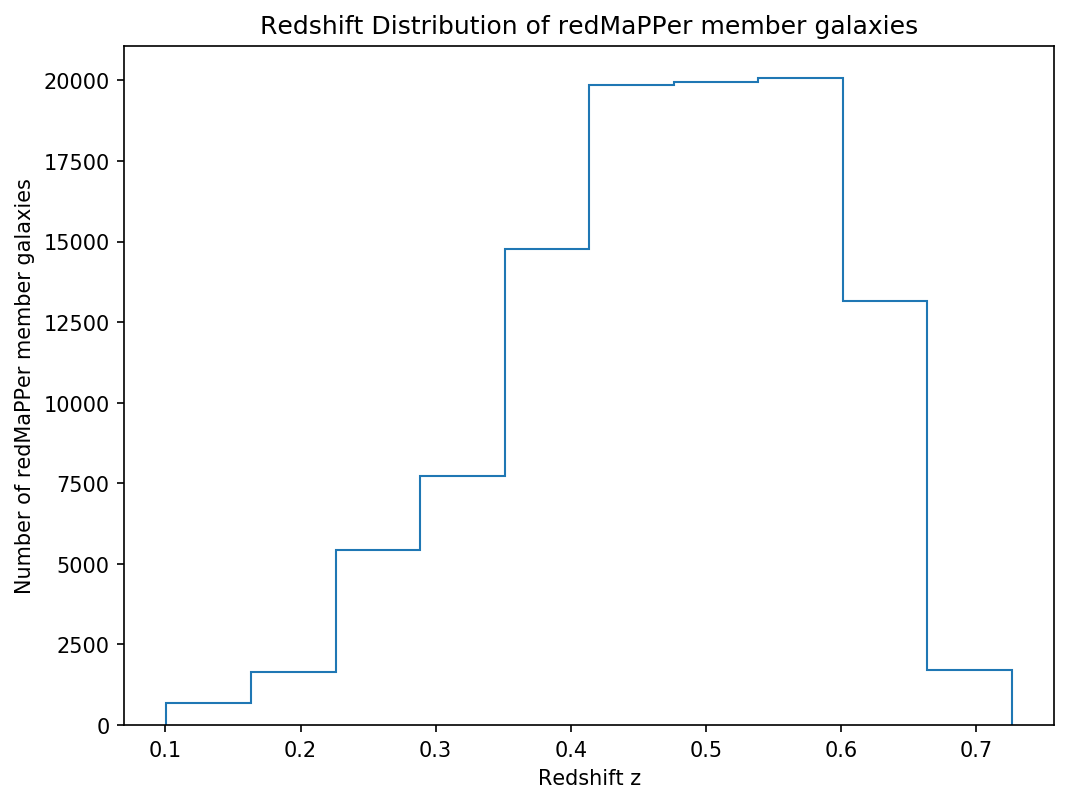

In [25]:
fig,ax=plt.subplots(figsize=(8,6),dpi=150)
ax.hist(members[('All','Z')],histtype='step')
ax.set_xlabel("Redshift z")
ax.set_ylabel("Number of redMaPPer member galaxies")
ax.set_title("Redshift Distribution of redMaPPer member galaxies")
plt.savefig("/home/adt35/des_y1_catalog/sa-master/images/z_hist.pdf")

# Abs Plots

Aggregated xi:
[-0.1943 -0.6484 -0.5508  1.4268 -1.2417  1.0823  5.9323  6.1807  0.3958
  9.8272]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -21.6072  -38.6829  -54.8525 -118.3528 -132.3311 -307.8601 -369.2659
 -343.2327 -263.5721    8.1394]
------------------------------------------------------------------------------
Aggregated npairs:
[  5.  10.  16.  41.  55. 160. 252. 352. 536. 912.]
------------------------------------------------------------------------------
Mean xi:
[-0.0389 -0.0648 -0.0344  0.0348 -0.0226  0.0068  0.0235  0.0176  0.0007
  0.0108]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3214 -3.8683 -3.4283 -2.8867 -2.406  -1.9241 -1.4653 -0.9751 -0.4917
  0.0089]
------------------------------------------------------------------------------


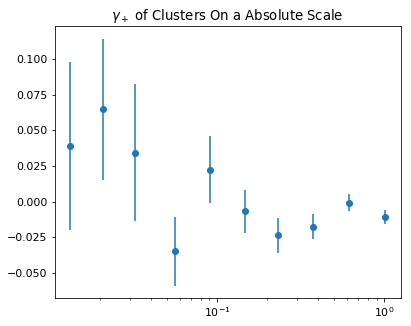

In [26]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

[ 8.0614e-03 -4.0169e-03  8.0985e-04 -8.0003e-04 -1.1234e-03 -1.6914e-05
  3.4635e-04 -8.3508e-05  1.5886e-04  6.9678e-05]
[-1.2262e-04  6.1101e-05 -1.2319e-05  1.2169e-05  1.7087e-05  2.5728e-07
 -5.2684e-06  1.2702e-06 -2.4164e-06 -1.0599e-06]


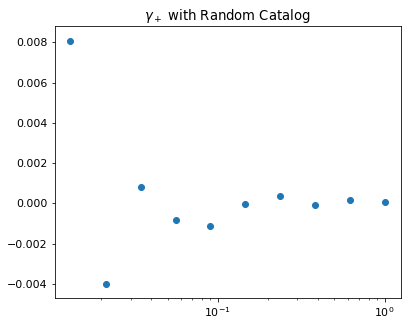

In [27]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

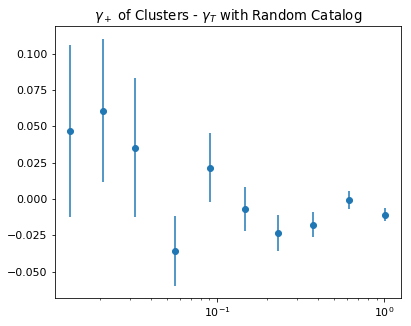

In [28]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

Aggregated xi:
[-0.0566 -0.4245  0.0202 -0.1271 -0.9117  0.3694  4.4416  7.2695  1.1028
  3.5485]
------------------------------------------------------------------------------
Aggregated meanlogr:
[  -4.3287  -34.6517  -47.2694  -58.4187 -130.917  -174.7276 -307.8372
 -292.8805 -227.6826  -30.0278]
------------------------------------------------------------------------------
Aggregated npairs:
[  1.   9.  14.  20.  54.  91. 207. 291. 435. 621.]
------------------------------------------------------------------------------
Mean xi:
[-0.0566 -0.0472  0.0014 -0.0064 -0.0169  0.0041  0.0215  0.025   0.0025
  0.0057]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3287 -3.8502 -3.3764 -2.9209 -2.4244 -1.9201 -1.4871 -1.0065 -0.5234
 -0.0484]
------------------------------------------------------------------------------


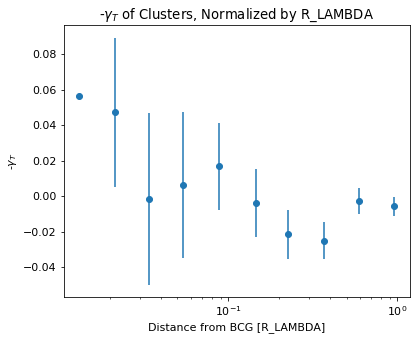

In [29]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"-$\gamma_T$ of Clusters, Normalized by R_LAMBDA")
plt.xlabel("Distance from BCG [R_LAMBDA]")
plt.ylabel(r"-$\gamma_T$")
plt.savefig("/home/adt35/des_y1_catalog/sa-master/images/gamma_T_rel.pdf")
print_data(sum_rel,mean_rel)

In [30]:
print("Error bar size")
print(sig_rel)

Error bar size
[   nan 0.0422 0.0484 0.0412 0.0244 0.0192 0.0139 0.0106 0.0073 0.0054]


In [31]:
np.sqrt(np.dot(np.dot(mean_rel[0],np.linalg.inv(cov_rel)),mean_rel[0]))

nan

In [32]:
len(cov_rel)

10

In [33]:
cov_rel

array([[        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan],
       [        nan,  1.7771e-03, -2.7068e-27,  7.7170e-05, -7.6721e-07,
         2.6083e-05,  1.5607e-05,  5.3214e-06,  1.1341e-05, -7.2795e-07],
       [        nan, -2.7068e-27,  2.3441e-03,  1.0390e-06, -1.0337e-25,
        -5.1563e-05, -4.8315e-05, -6.4673e-06, -1.1171e-05, -6.7193e-25],
       [        nan,  7.7170e-05,  1.0390e-06,  1.6954e-03, -1.5122e-05,
         3.2816e-06,  5.3749e-08, -9.1726e-07, -1.6269e-05, -1.2936e-05],
       [        nan, -7.6721e-07, -1.0337e-25, -1.5122e-05,  5.9713e-04,
         5.7861e-06,  4.1321e-06,  7.1950e-07, -1.5707e-06,  1.1056e-06],
       [        nan,  2.6083e-05, -5.1563e-05,  3.2816e-06,  5.7861e-06,
         3.6770e-04, -6.1650e-06, -2.5693e-06, -3.1943e-06,  4.0322e-06],
       [        nan,  1.5607e-05, -4.8315e-05,  5.3749e-08,  4.1321e-06,
        -6.1650e-06,  1.9202e-04, -5.3503e-06

In [34]:
cov_rel.min()

nan

In [35]:
cov_rel.max()

nan

In [36]:
ticks_val=np.exp(mean_rel[1])
ticks_string=["{:.2f}".format(val) for val in ticks_val]
print(ticks_string)

['0.01', '0.02', '0.03', '0.05', '0.09', '0.15', '0.23', '0.37', '0.59', '0.95']


In [37]:
fig,ax=plt.subplots(figsize=(6.2,5))

from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker
import matplotlib.colors as colors

plt.matshow(np.abs(cov_rel),fignum=0,norm=colors.LogNorm(vmin=np.abs(cov_rel).min(),vmax=np.abs(cov_rel).max()))

ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.00))

ax.set_xticks(range(len(ticks_val)))
ax.set_yticks(range(len(ticks_val)))

ax.set_xticklabels(ticks_val)


ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticks_string))
ax.yaxis.set_major_formatter(ticker.FixedFormatter(ticks_string))

ax.set_xlabel("[R_LAMBDA]",labelpad=10)

def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)


cb=plt.colorbar(pad=0.06,format=ticker.FuncFormatter(fmt))




ax.set_title('Covariance Matrix of $-\gamma_T$ at Different R_LAMBDA',fontsize=11,pad=12);
plt.savefig('/home/adt35/des_y1_catalog/sa-master/images/cov.pdf')

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_23/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/matplotlib/colorbar.py:613: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(*ax.dataLim.intervalx)
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_23/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/matplotlib/colorbar.py:614: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(*ax.dataLim.intervaly)


ValueError: values must all be positive

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f6b16f8b510> (for post_execute):


ValueError: values must all be positive

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_23/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/matplotlib/colorbar.py:300: RuntimeWarning: invalid value encountered in log10
  rtol = (np.log10(vmax) - np.log10(vmin)) * 1e-10
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_23/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/matplotlib/colorbar.py:301: RuntimeWarning: invalid value encountered in log10
  ticks = ticks[(np.log10(ticks) >= np.log10(vmin) - rtol) &
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_23/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/matplotlib/colorbar.py:301: RuntimeWarning: invalid value encountered in greater_equal
  ticks = ticks[(np.log10(ticks) >= np.log10(vmin) - rtol) &
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_23/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/matplotlib/colorbar.py:302: RuntimeWarning: invali

ValueError: values must all be positive

<Figure size 446.4x360 with 2 Axes>

In [ ]:
# print(f.number)

In [ ]:
np.dot(mean_rel[0],np.linalg.inv(cov_rel))

In [ ]:
mean_rel[0]

In [ ]:
cov_rel

In [ ]:
np.linalg.inv(cov_rel)